# Impact of varying the caring coefficient

### Grid World Description:
There are two agents.
Both have the objective of reaching their respective door.
Both their rewards are -1 except when they reach their doors.
There are 8 actions (4 movements, 1 do nothing, 1 pick up, 1 drop, and 1 use).
The episode terminates if they collide with the wall, or with each other.


## Aim:
Show that if we consider red agent to start caring, it can avoid negative effects.
We can increase this "caring" by increasing the caring coefficient, but a big value can in fact be bad for both.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from collections import defaultdict
import random
plt.style.use("ggplot")
rcParams['figure.figsize'] = 10, 10

In [ ]:
dimension = 6

# represents the size of the world
main_axis = ['', '1', '2', '3', '4', '5', '6' '', '']
grid_axis = np.linspace(0, 9, 9)
grid_interval = grid_axis[1] - grid_axis[0]
door_width = 0.1
grid_world = np.zeros((dimension+1, dimension+1))

actions = {0:'up', 1: 'left', 2: 'down', 3:'right'}

class EscapeRoom:

    def __init__(self):
        """
        Initializes everything
        """

        default_params = {'p1' : [1, 5], 'p2' : [4, 5], 'k1' : [2, 4], 'k2' : [3, 3],
                          'd1' : [1, 3], 'd2' : [5,2], 'i1' : [], 'i2' : []}

        # defining keys and doors
        self.d1 = default_params['d1']
        self.d2 = default_params['d2']
        self.k1 = default_params['k1']
        self.k2 = default_params['k2']

        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']

        # inventory
        self.i1 = default_params['i2']
        self.i2 = default_params['i1']

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

    def reset(self):
        """
        Resets the board from start
        Returns:
            state: the initial state
        """

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

        # defining keys and doors
        default_params = {'p1' : [1, 5], 'p2' : [4, 5], 'k1' : [2, 4], 'k2' : [3, 3],
                          'd1' : [1, 3], 'd2' : [5,2], 'i1' : [], 'i2' : []}

        self.d1 = default_params['d1']
        self.d2 = default_params['d2']
        self.k1 = default_params['k1']
        self.k2 = default_params['k2']

        # agents
        self.p1 = default_params['p1']
        self.p2 = default_params['p2']

        # inventory
        self.i1 = default_params['i1']
        self.i2 = default_params['i2']
        self.walls = [[0, i] for i in range(7)] + [[i, 0] for i in range(7)] + [[i,7] for i in range(7)] + [[7,i] for i in range(7)]

        return self.state

    def step(self, action = [0,0]):

        """
        Args:
            action: This is an array with two entries, one of the first agent, and the other of the second agent
        Returns:
            state space: This is the current position of all the agents, the respective keys and their inventories
            reward: This is an array, which has two entries, one for each agent
            terminated: A boolean indicator of weather the episode had ended or not
            None: simply used for debugging
        """

        reward_array = [-1, -1]

        ############ MOVING FIRST AGENT #######################

        # movements
        if action[0] == 0:
            self.p1[1] += 1
            if self.p1 in self.walls:
              self.p1[1] -= 1
        elif action[0] == 1:
            self.p1[0] -= 1
            if self.p1 in self.walls:
              self.p1[0] += 1
        elif action[0] == 2:
            self.p1[1] -= 1
            if self.p1 in self.walls:
              self.p1[1] += 1
        elif action[0] == 3:
            self.p1[0] += 1
            if self.p1 in self.walls:
              self.p1[0] -= 1

        # picking up keys
        elif action[0] == 0 and (self.p1 == self.k1 or self.p1 == self.k2):
            if self.p1 == self.k1:
                self.i1.append("k1")
                self.k1 = None
            else:
                self.i1.append("k2")
                self.k2 = None

        # dropping keys
        elif action[0] == 5 and len(self.i1) > 0:
            k = self.i1.pop()
            if k == "k1":
                self.k1 = self.p1
            else:
                self.k2 = self.p1
        else:
            pass

        ##################### NOW IT IS AGENT 2'S TURN ###########################

        
        if action[1] == 0:
            self.p2[1] += 1
            if self.p2 in self.walls:
              self.p2[1] -= 1
        elif action[1] == 1:
            self.p2[0] -= 1
            if self.p2 in self.walls:
              self.p2[0] += 1
        elif action[1] == 2:
            self.p2[1] -= 1
            if self.p2 in self.walls:
              self.p2[1] += 1
        elif action[1] == 3:
            self.p2[0] += 1
            if self.p2 in self.walls:
              self.p2[0] -= 1


    
        if self.p1 == self.k1:
            self.i1.append("k1")
            self.k1 = None
        elif self.p2 == self.k2:
            self.i2.append("k2")
            self.k2 = None
        else:
          pass

        # state
        self.state = [self.p1, self.p2, self.k1, self.k2, self.i1, self.i2]

        if self.p1 == self.p2:
          return self.state,  [-5, -5], True, None
        ## you reached the goal!
        if self.p2 == self.d2 and "k2" in self.i2:
            reward_array[1] = 10

        if self.p1 == self.d1 and "k1" in self.i1:
            reward_array[0] = 10
            return self.state, reward_array, True, None

        return self.state, reward_array, False, None

    def render(self):

        # to change positions
        agent1 = plt.Circle((grid_interval*(self.p1[0]+0.5),grid_interval*(self.p1[1]+0.5)), 0.3, color='r', alpha = 0.5)
        agent2 = plt.Circle((grid_interval*(self.p2[0]+0.5),grid_interval*(self.p2[1]+0.5)), 0.3, color='blue', alpha = 0.5)

        door1 = plt.Rectangle((self.d1[0]*grid_interval, self.d1[1]*grid_interval), grid_interval, grid_interval, color = "red", alpha = 0.8)
        door2 = plt.Rectangle((self.d2[0]*grid_interval, self.d2[1]*grid_interval), grid_interval, grid_interval, color = "blue", alpha = 0.8)

        if self.k1:
            key1 = plt.Rectangle(((self.k1[0]+0.375)*grid_interval,(self.k1[1]+0.25)*grid_interval), 0.25, 0.5, angle = -10, color = "red", alpha = 0.5)
        if self.k2:
            key2 = plt.Rectangle(((self.k2[0]+0.375)*grid_interval,(self.k2[1]+0.25)*grid_interval), 0.25, 0.5, angle = -10, color = "blue", alpha = 0.5)

        # wall -> DO NOT CHANGE
        wall1 = plt.Rectangle((0,0), grid_interval, 13, color = "black")
        wall2 = plt.Rectangle((0,0), 13, grid_interval, color = "black")
        wall4 = plt.Rectangle((0,grid_axis[-2]), 13, grid_axis[1], color = "black")
        wall3 = plt.Rectangle((grid_axis[-2],0),grid_axis[1], 13, color = "black")

        # get plot axis
        fig = plt.figure(figsize = (10,10))
        ax = plt.gca()

        # wall -> DO NOT CHANGE
        ax.add_patch(wall1)
        ax.add_patch(wall2)
        ax.add_patch(wall3)
        ax.add_patch(wall4)

        # world definitions
        ax.add_patch(door1)
        ax.add_patch(door2)
        if self.k1:
            ax.add_patch(key1)
        if self.k2:
            ax.add_patch(key2)

        # plot agents
        ax.add_patch(agent1)
        ax.add_patch(agent2)

        plt.xticks(ticks = grid_axis, labels = main_axis)
        plt.yticks(ticks = grid_axis, labels = main_axis)
        plt.show()

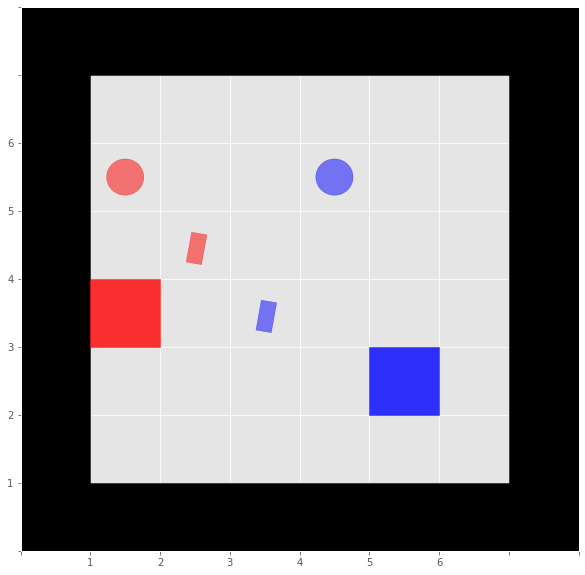

In [ ]:
world = EscapeRoom()
world.render()

[[3, 4], [4, 2], None, [3, 3], ['k1'], []] [-1, -1] False


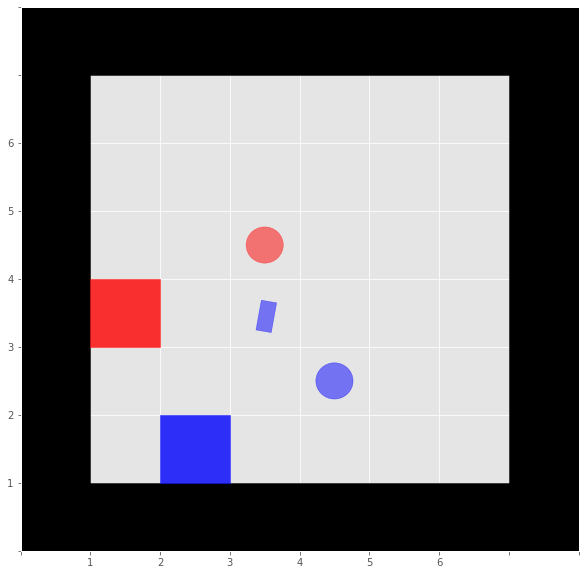

[[2, 4], [3, 2], None, [3, 3], ['k1'], []] [-1, -1] False


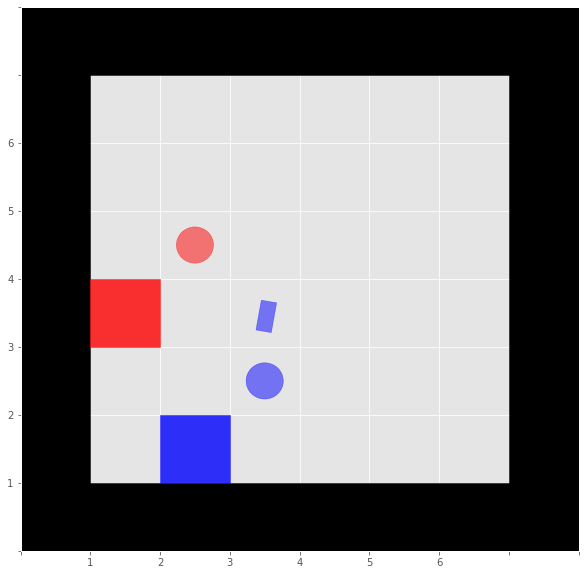

[[2, 5], [4, 2], None, [3, 3], ['k1'], []] [-1, -1] False


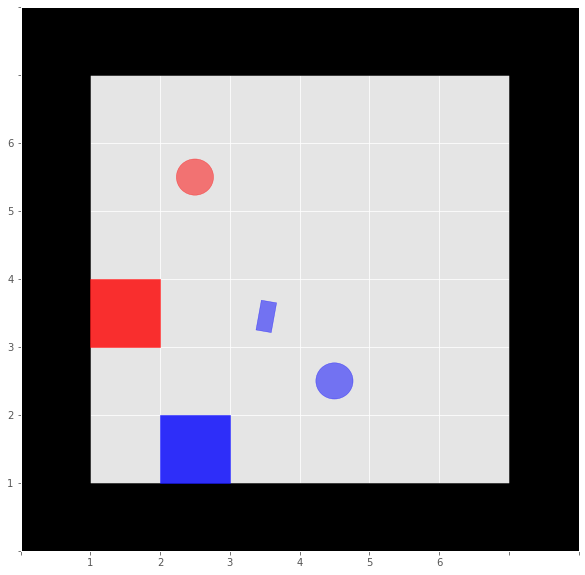

[[2, 4], [3, 2], None, [3, 3], ['k1'], []] [-1, -1] False


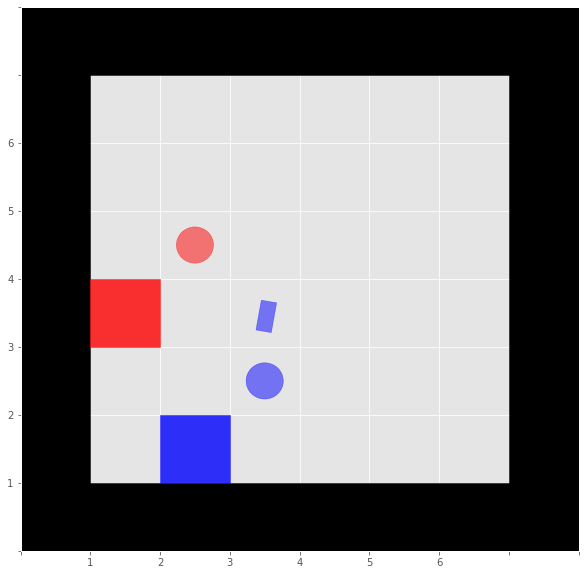

[[2, 5], [4, 2], None, [3, 3], ['k1'], []] [-1, -1] False


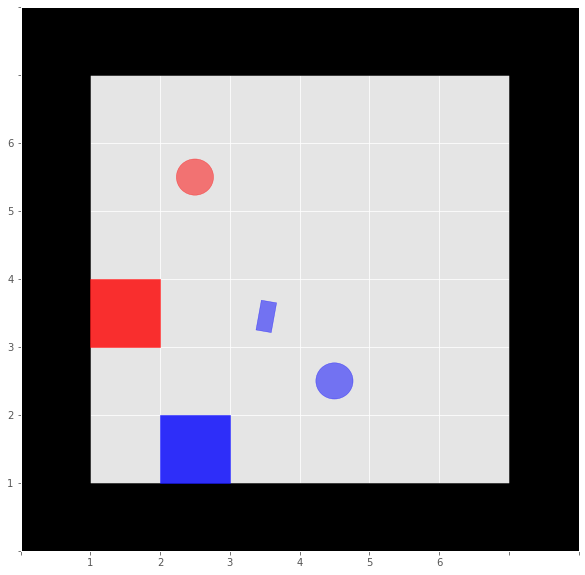

[[2, 6], [5, 2], None, [3, 3], ['k1'], []] [-1, -1] False


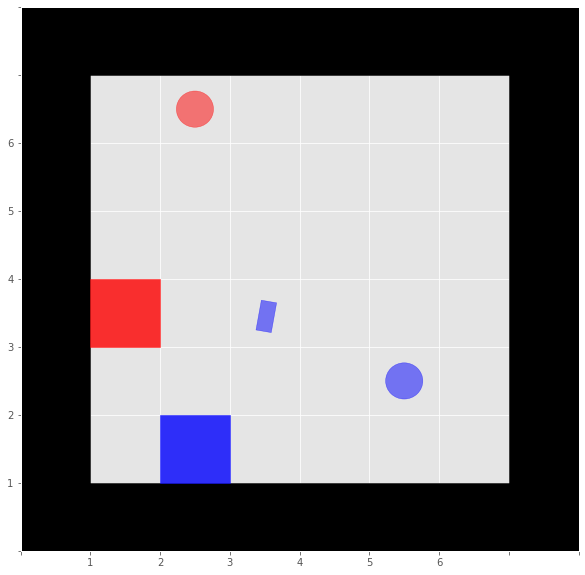

[[2, 5], [4, 2], None, [3, 3], ['k1'], []] [-1, -1] False


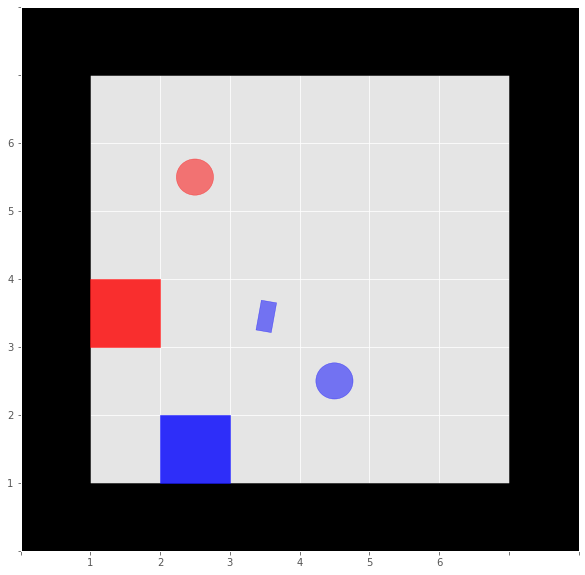

[[2, 6], [5, 2], None, [3, 3], ['k1'], []] [-1, -1] False


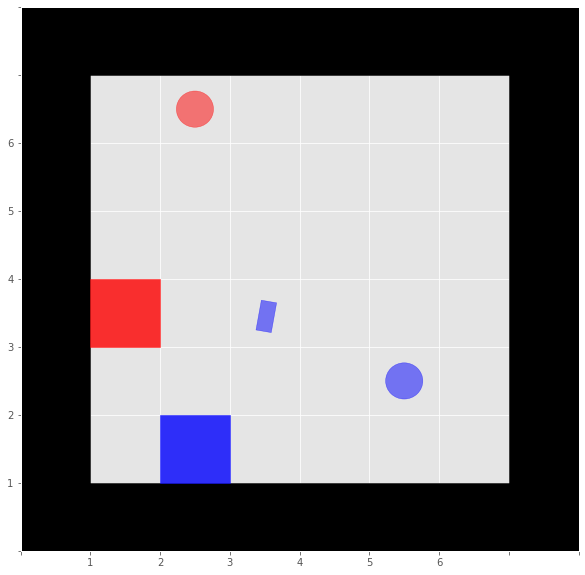

[[2, 6], [4, 2], None, [3, 3], ['k1'], []] [-1, -1] False


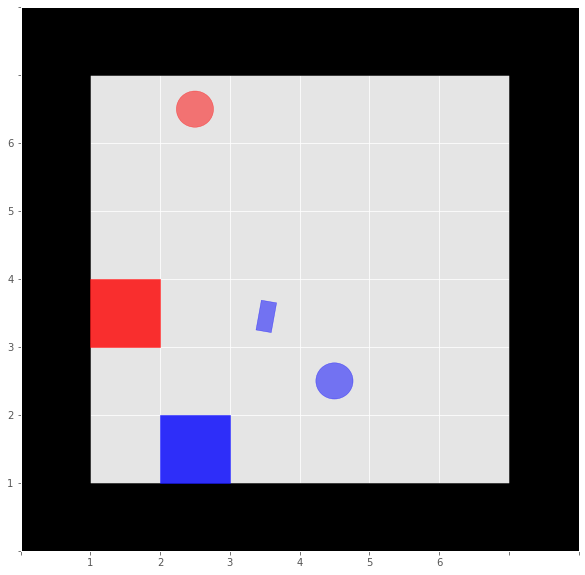

[[3, 6], [4, 1], None, [3, 3], ['k1'], []] [-1, -1] False


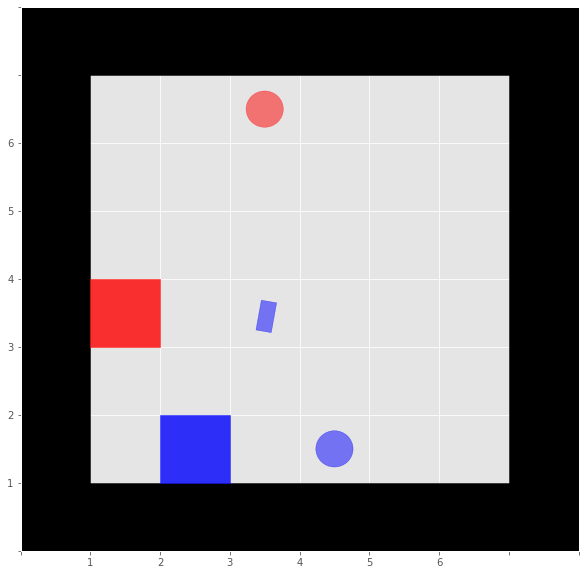

[[2, 6], [4, 1], None, [3, 3], ['k1'], []] [-1, -1] False


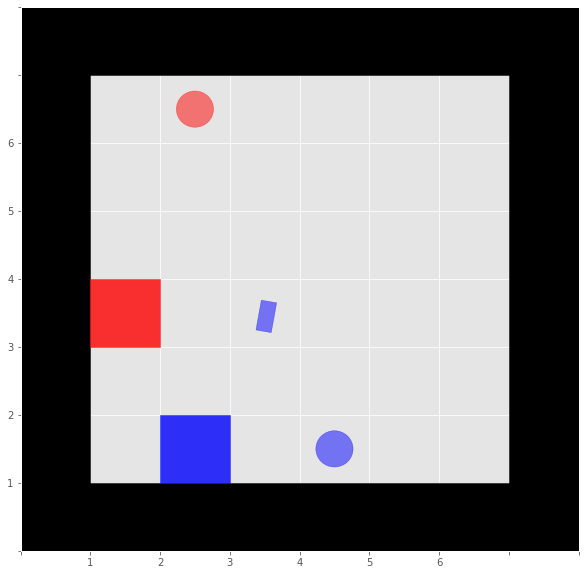

[[1, 6], [4, 1], None, [3, 3], ['k1'], []] [-1, -1] False


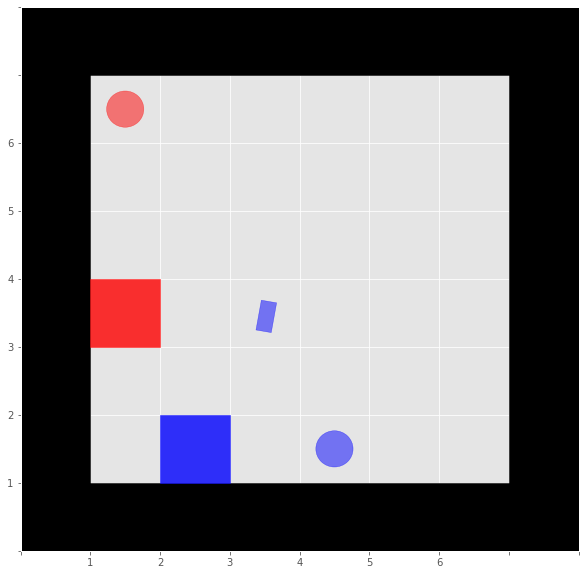

[[1, 6], [4, 1], None, [3, 3], ['k1'], []] [-1, -1] False


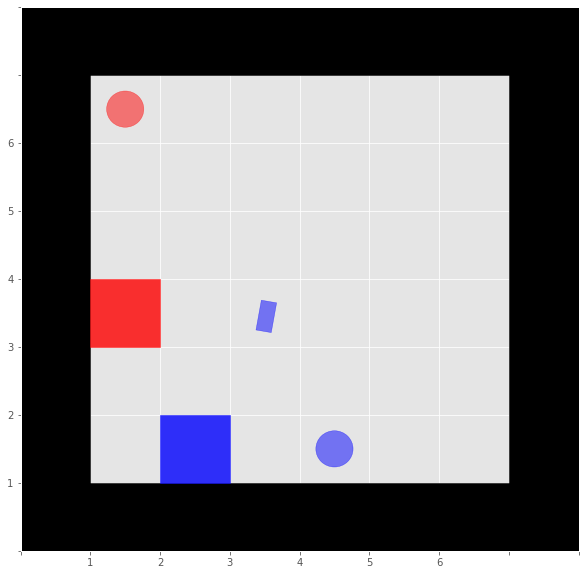

[[1, 6], [4, 2], None, [3, 3], ['k1'], []] [-1, -1] False


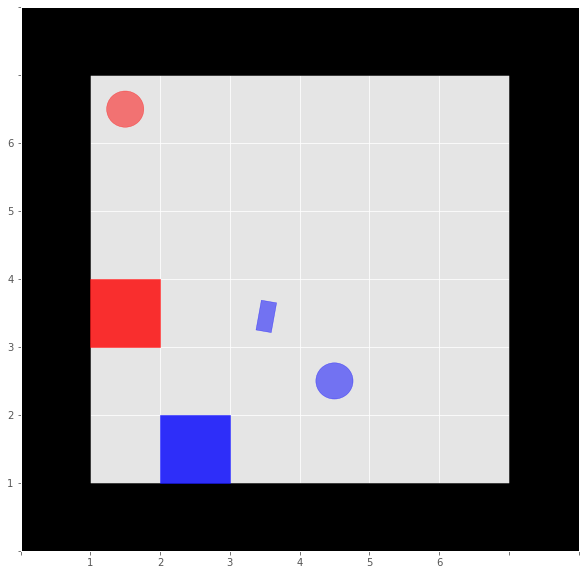

[[1, 5], [4, 3], None, [3, 3], ['k1'], []] [-1, -1] False


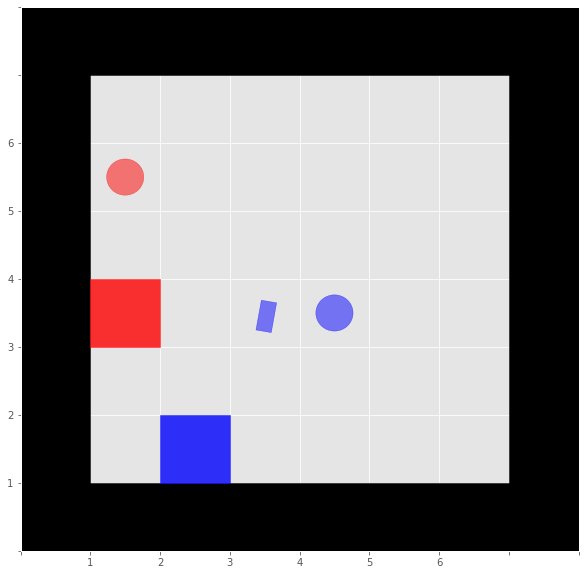

[[1, 6], [4, 2], None, [3, 3], ['k1'], []] [-1, -1] False


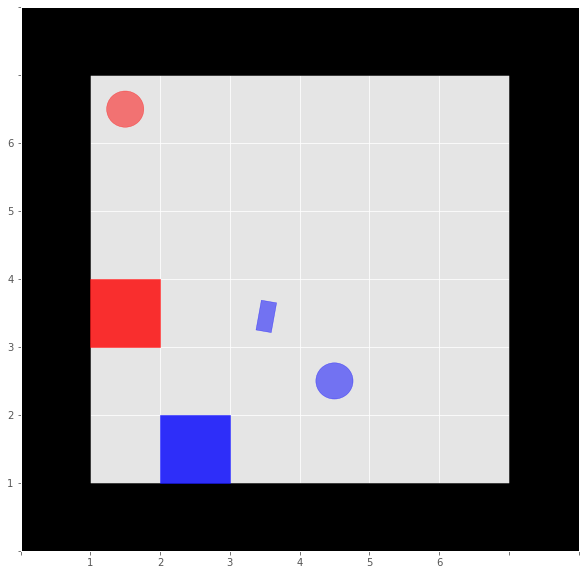

[[1, 6], [5, 2], None, [3, 3], ['k1'], []] [-1, -1] False


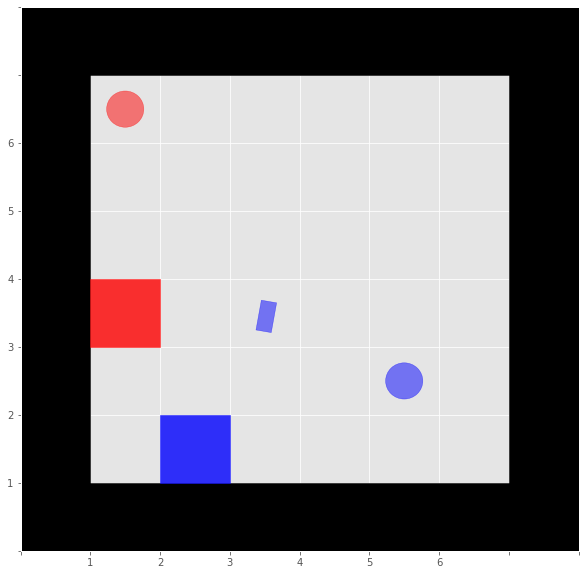

[[1, 5], [5, 3], None, [3, 3], ['k1'], []] [-1, -1] False


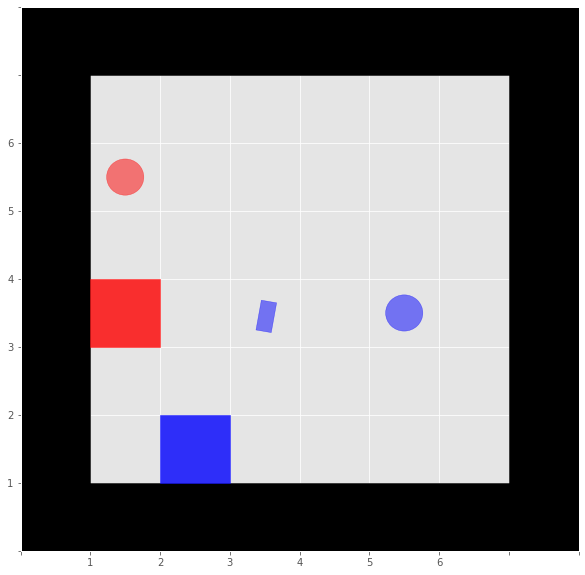

[[2, 5], [5, 4], None, [3, 3], ['k1'], []] [-1, -1] False


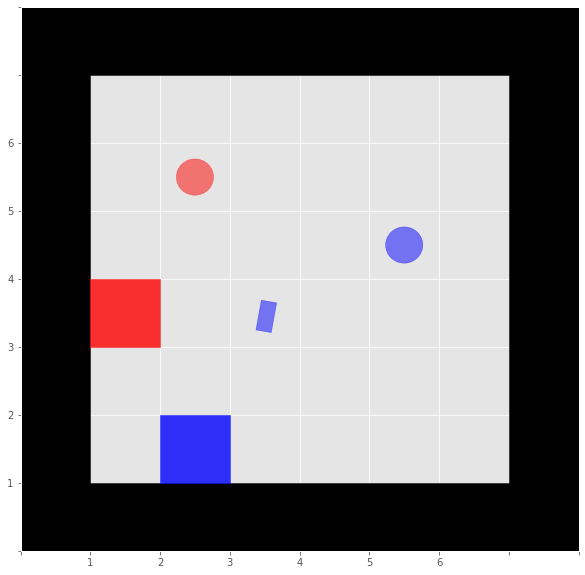

[[2, 4], [5, 5], None, [3, 3], ['k1'], []] [-1, -1] False


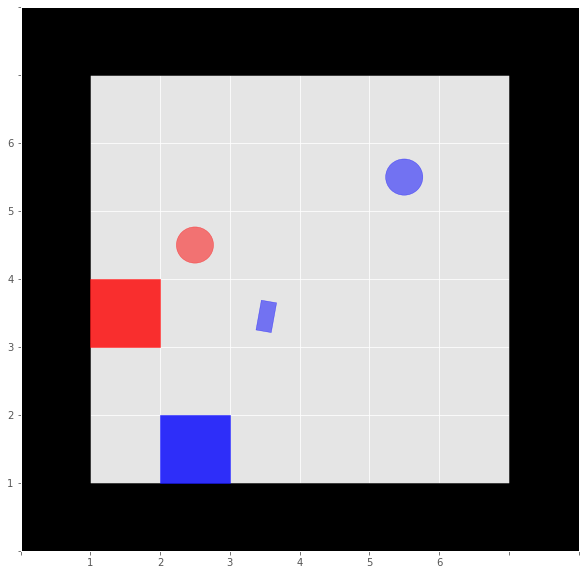

[[2, 3], [6, 5], None, [3, 3], ['k1'], []] [-1, -1] False


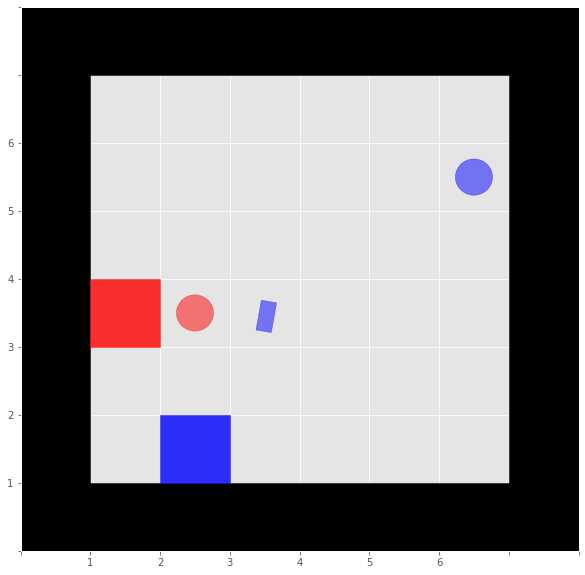

[[2, 2], [5, 5], None, [3, 3], ['k1'], []] [-1, -1] False


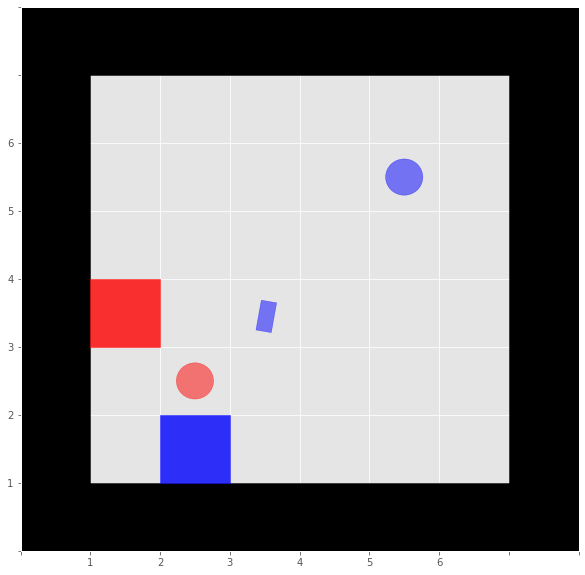

[[2, 3], [5, 6], None, [3, 3], ['k1'], []] [-1, -1] False


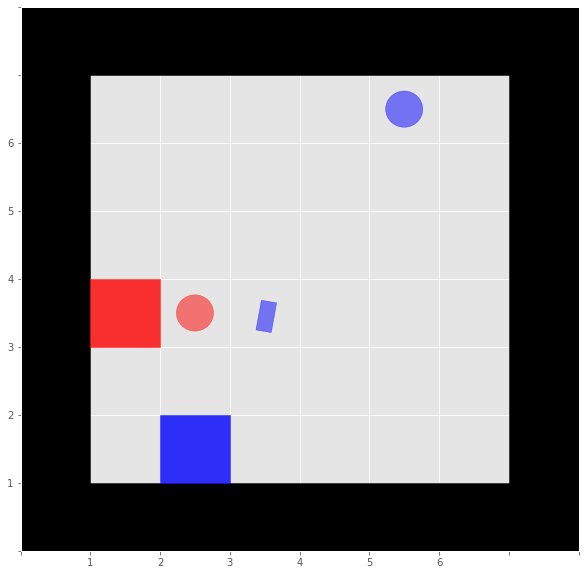

[[3, 3], [5, 6], None, [3, 3], ['k1'], []] [-1, -1] False


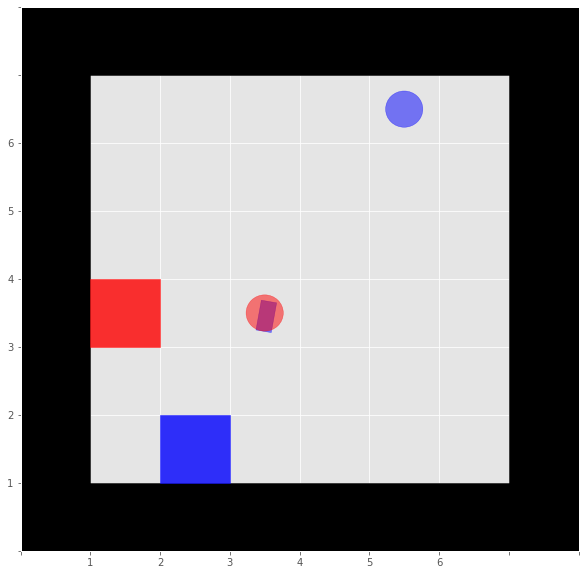

[[3, 2], [4, 6], None, [3, 3], ['k1'], []] [-1, -1] False


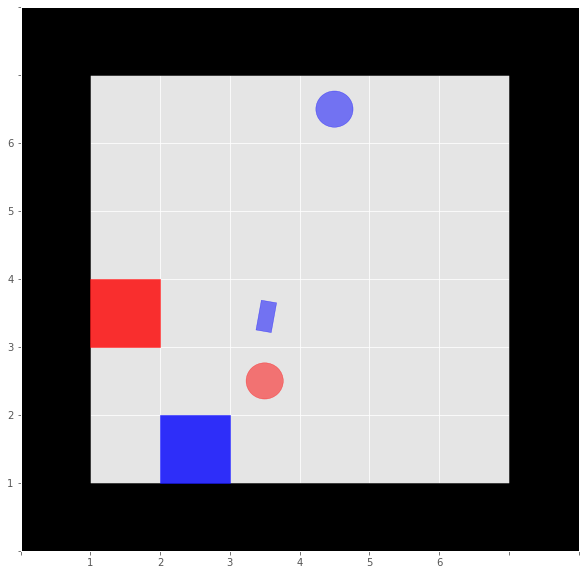

[[4, 2], [3, 6], None, [3, 3], ['k1'], []] [-1, -1] False


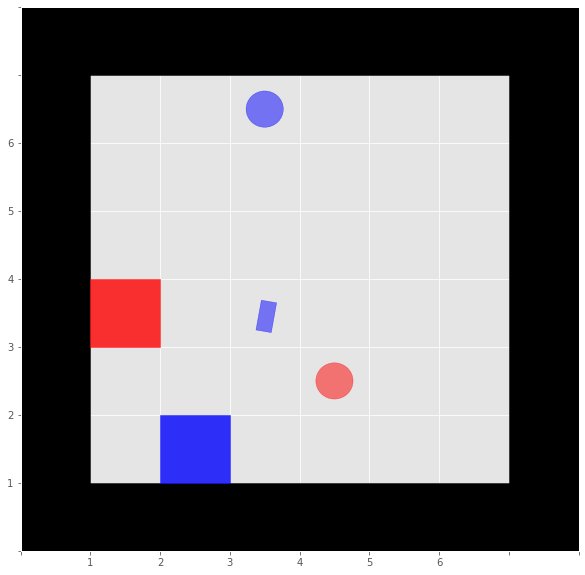

[[4, 3], [4, 6], None, [3, 3], ['k1'], []] [-1, -1] False


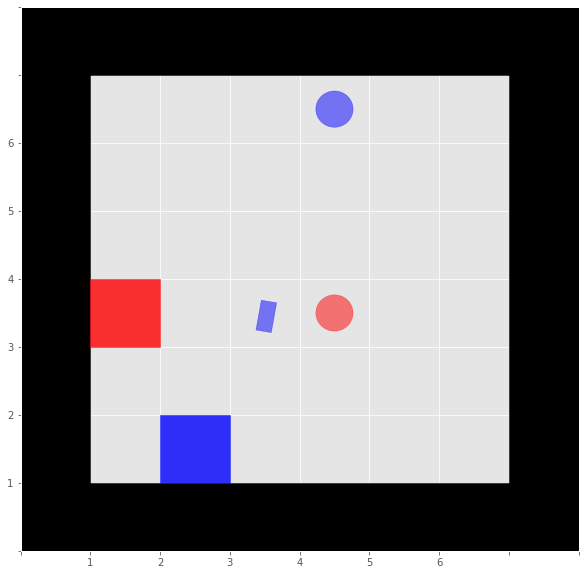

[[5, 3], [4, 6], None, [3, 3], ['k1'], []] [-1, -1] False


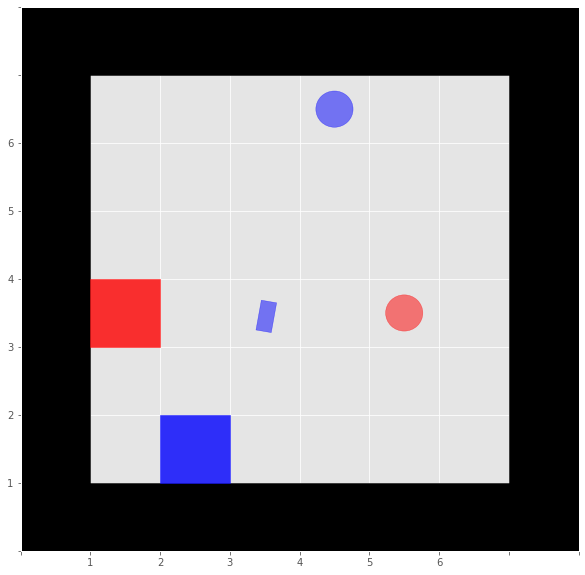

[[5, 4], [3, 6], None, [3, 3], ['k1'], []] [-1, -1] False


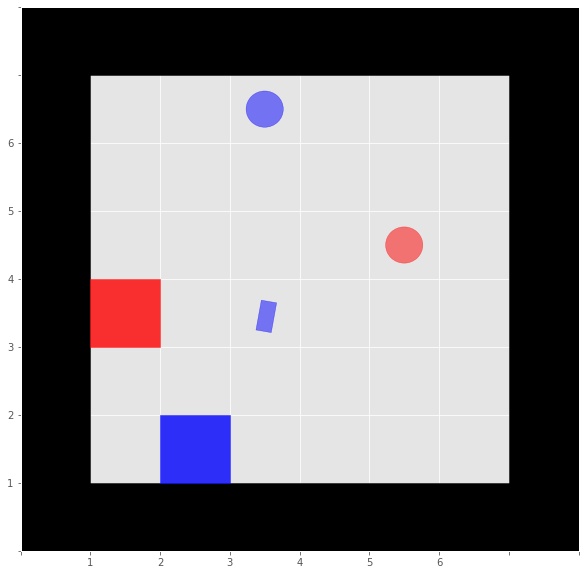

[[5, 5], [3, 6], None, [3, 3], ['k1'], []] [-1, -1] False


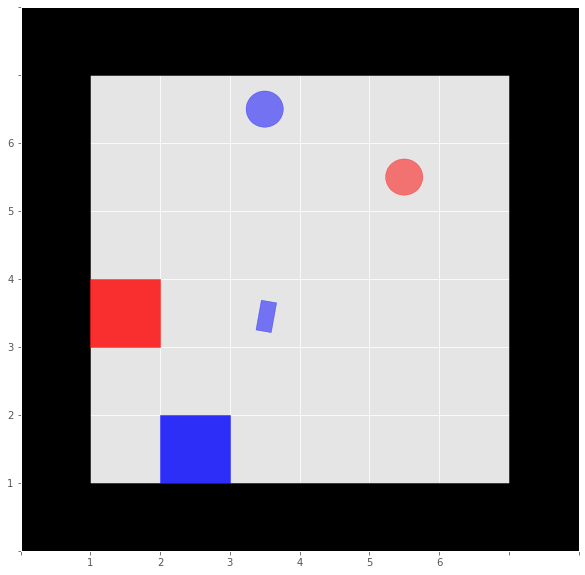

[[4, 5], [3, 6], None, [3, 3], ['k1'], []] [-1, -1] False


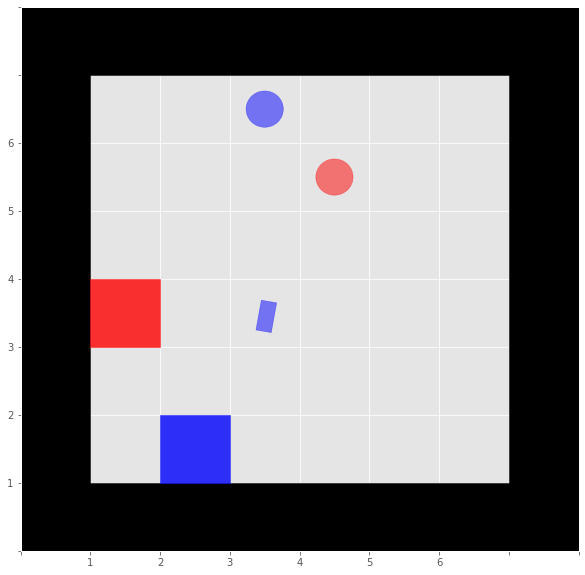

[[4, 6], [3, 5], None, [3, 3], ['k1'], []] [-1, -1] False


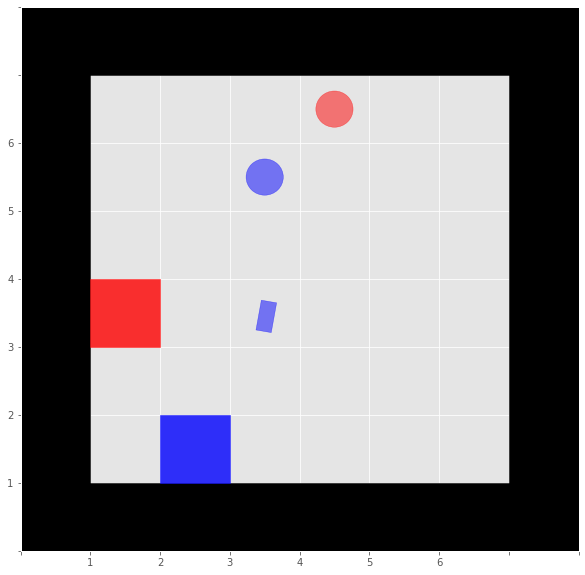

[[4, 6], [2, 5], None, [3, 3], ['k1'], []] [-1, -1] False


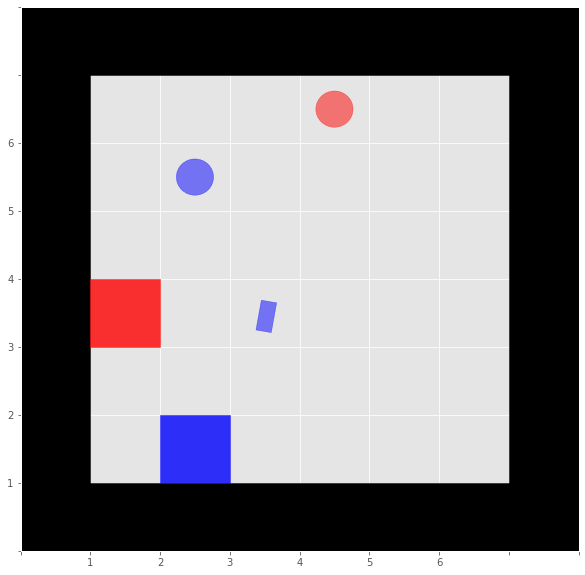

[[5, 6], [2, 4], None, [3, 3], ['k1'], []] [-1, -1] False


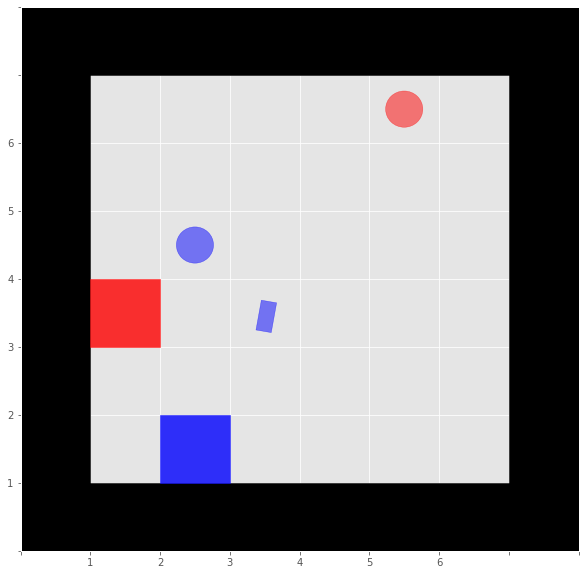

[[5, 5], [2, 3], None, [3, 3], ['k1'], []] [-1, -1] False


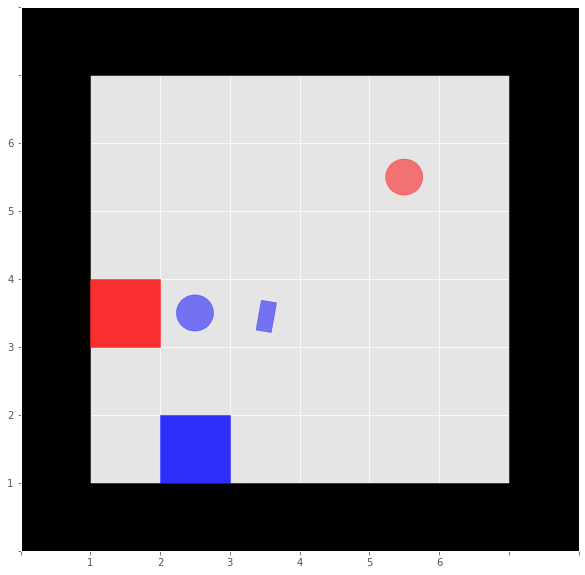

[[4, 5], [3, 3], None, None, ['k1'], ['k2']] [-1, -1] False


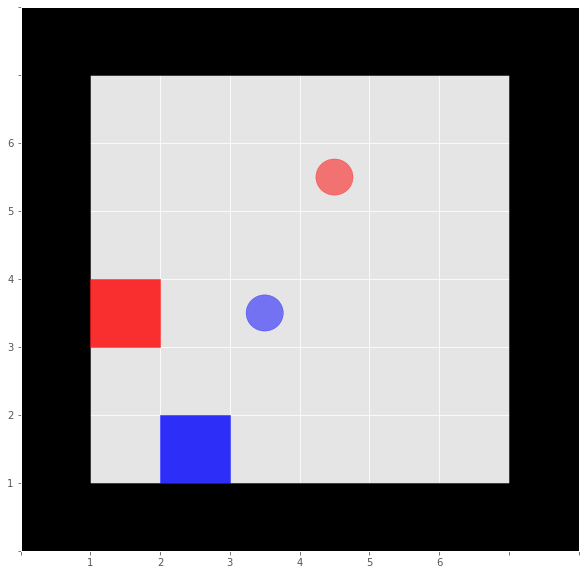

[[4, 6], [2, 3], None, None, ['k1'], ['k2']] [-1, -1] False


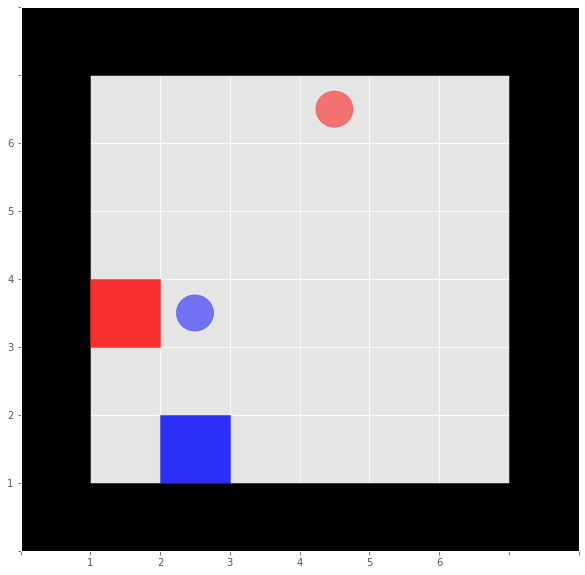

[[3, 6], [3, 3], None, None, ['k1'], ['k2']] [-1, -1] False


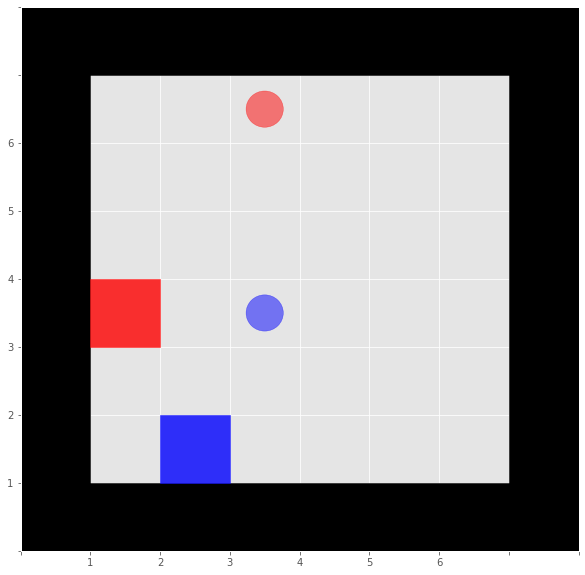

[[2, 6], [4, 3], None, None, ['k1'], ['k2']] [-1, -1] False


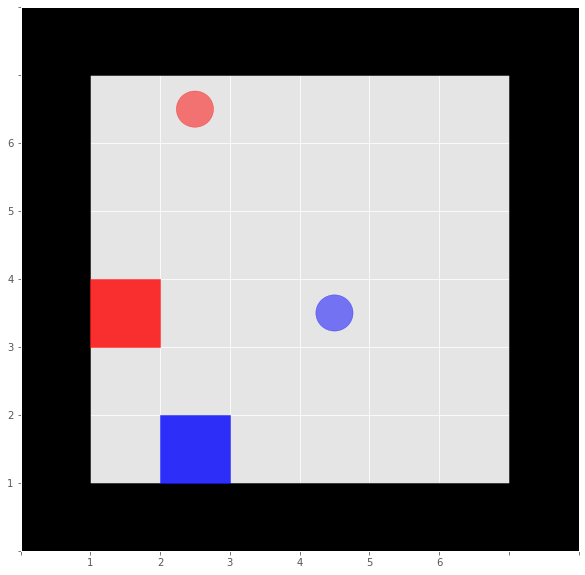

[[3, 6], [5, 3], None, None, ['k1'], ['k2']] [-1, -1] False


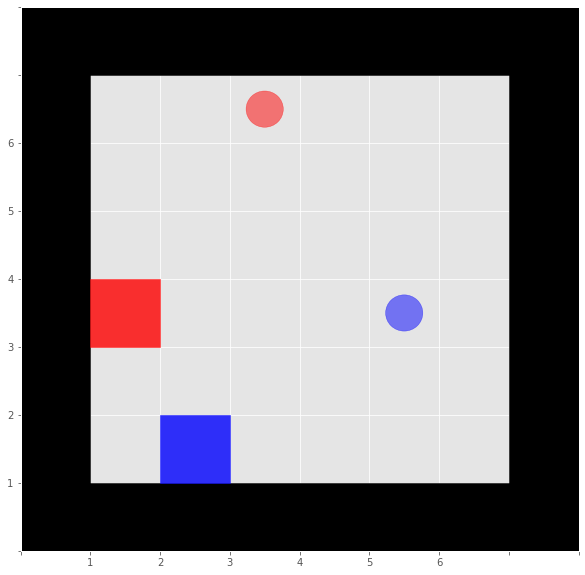

[[3, 6], [5, 2], None, None, ['k1'], ['k2']] [-1, -1] False


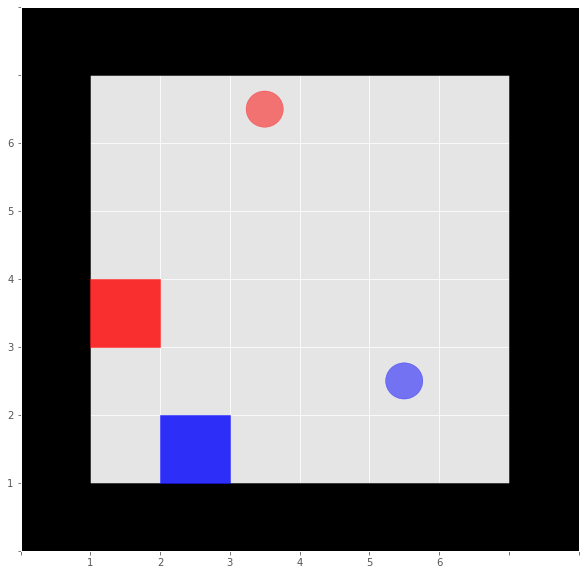

[[2, 6], [5, 1], None, None, ['k1'], ['k2']] [-1, -1] False


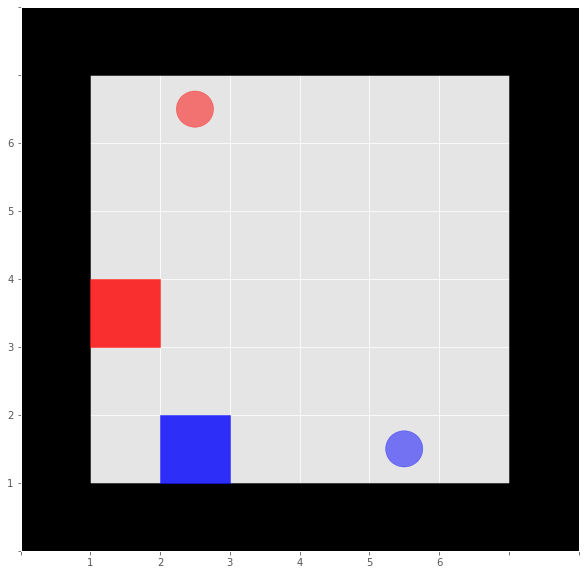

[[2, 5], [4, 1], None, None, ['k1'], ['k2']] [-1, -1] False


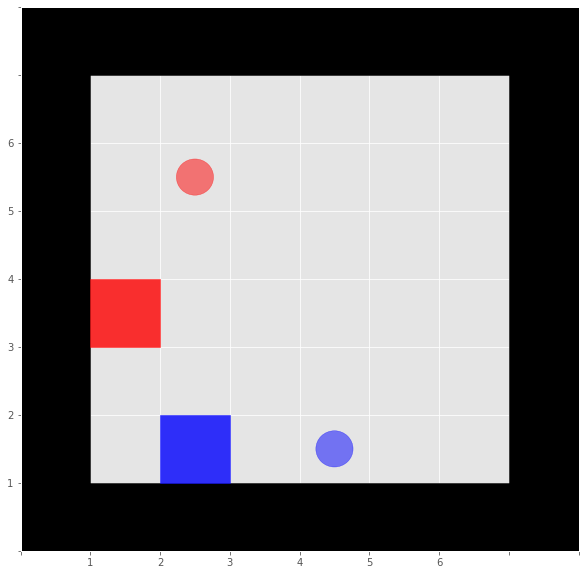

[[1, 5], [5, 1], None, None, ['k1'], ['k2']] [-1, -1] False


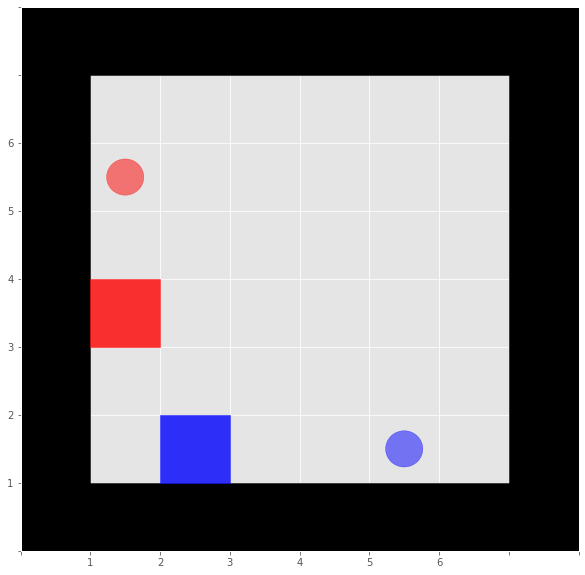

[[1, 5], [5, 2], None, None, ['k1'], ['k2']] [-1, -1] False


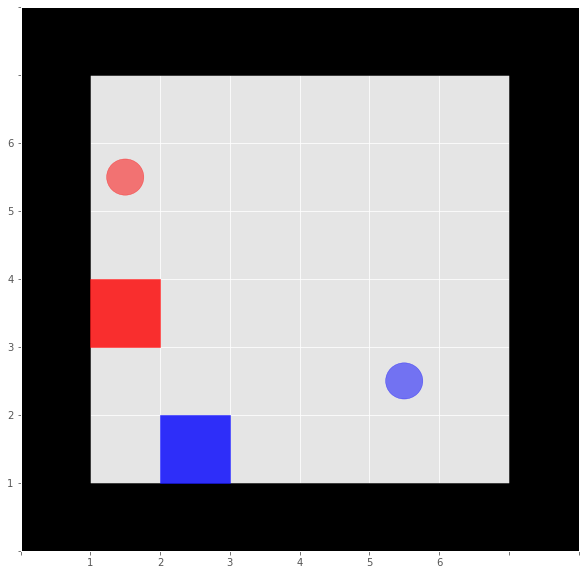

[[1, 4], [5, 1], None, None, ['k1'], ['k2']] [-1, -1] False


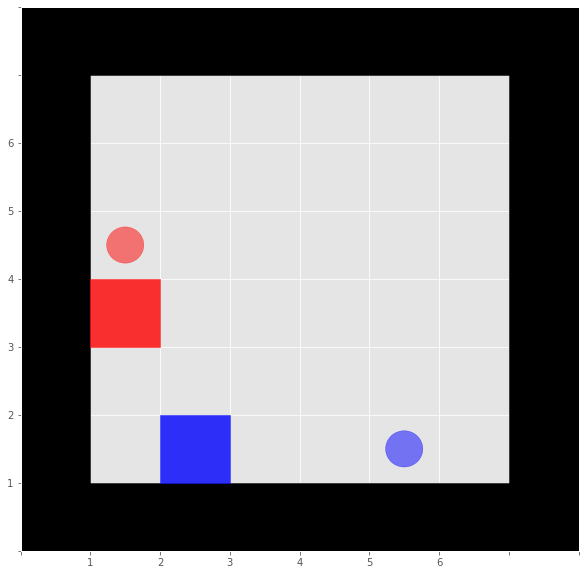

[[1, 4], [5, 2], None, None, ['k1'], ['k2']] [-1, -1] False


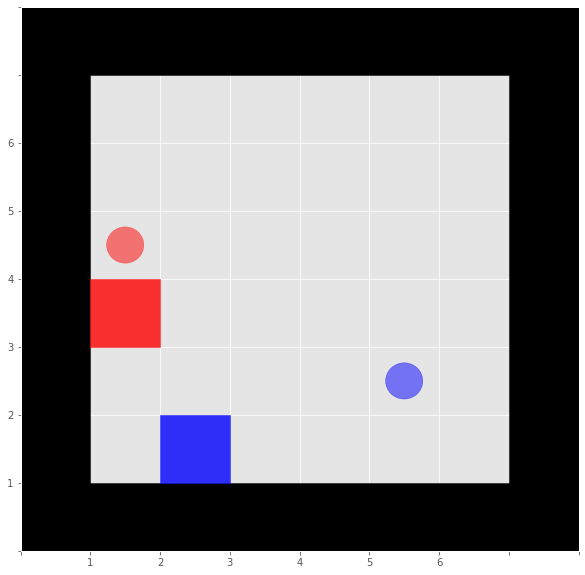

[[1, 4], [4, 2], None, None, ['k1'], ['k2']] [-1, -1] False


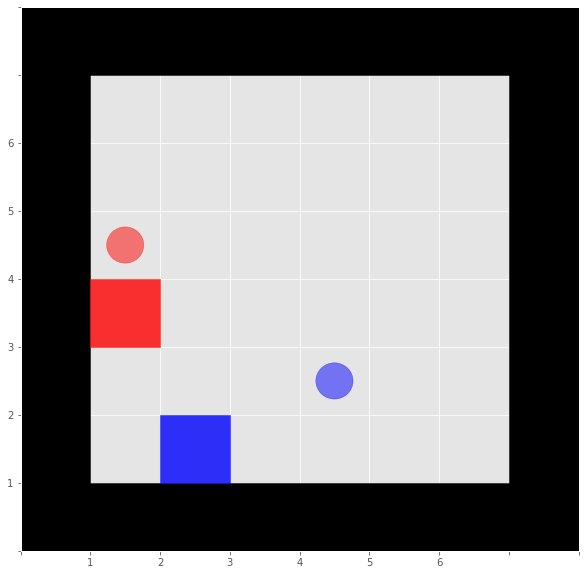

[[1, 3], [3, 2], None, None, ['k1'], ['k2']] [10, -1] True


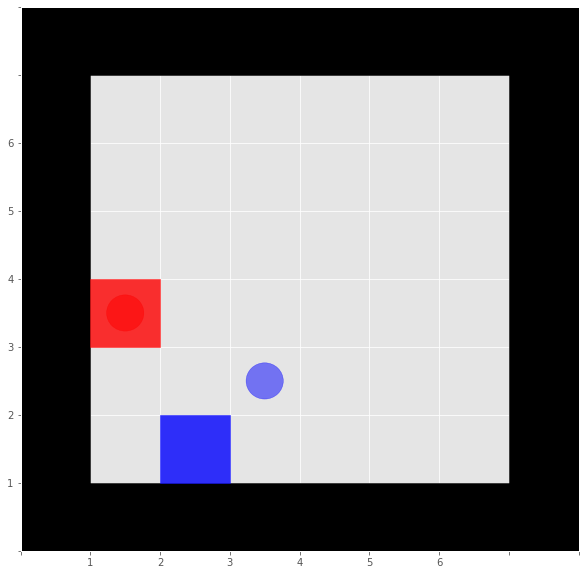

In [ ]:
# random testing
world = EscapeRoom()
state=world.reset()
state,reward,done,_=world.step()
while not done:
  action1=random.randint(0,3)
  action2=random.randint(0,3)
  state,reward,done,_=world.step([action1,action2])
  print(state,reward,done)
  world.render()

In [ ]:
q=defaultdict(int)
alpha=0.1
epsilon=1.0
gamma=0.99

In [ ]:
def epsilon_greedy_policy(q,state,epsilon):
  actions=4
  if random.uniform(0,1)<epsilon:
    return [random.randint(0,actions-1),random.randint(0,actions-1)]
  else:
    l=-100000000000
    index=[]
    for i in np.arange(actions):
      for j in np.arange(actions):
        if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>l:
          l=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
          index=[i,j]
  return index

In [ ]:
def episode_simulator(epsilon):
  env = EscapeRoom()
  prev_state=env.reset()
  states=[]
  actions=[]
  rewards=[]
  while True:
    #env.render()
    action=epsilon_greedy_policy(q,prev_state,epsilon)
    print(action)
    next_state,reward,done,_=env.step(action)
    states.append(next_state)
    actions.append(action)
    rewards.append(reward)
    prev_state=next_state
    if done==True:
      break
  return(states,actions,rewards)

In [ ]:
def update_qtable(q,prev_state,action,reward,next_state,alpha,gamma):
  actions=4
  qa=-1000000000
  for i in np.arange(actions):
    for j in np.arange(actions):
      if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>qa:
        qa=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
  q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])]=q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])]+alpha*(gamma*qa+reward-q[(prev_state[0][0],prev_state[0][1],prev_state[1][0],prev_state[1][1],action[0],action[1])])
  return q

# Learning the Q-function of agent 1 

In [ ]:
#i=0
q=defaultdict(lambda:1/4)
epsilon=1.0

number_of_red_wins =  []

no_iter=100000
avg_reward=[]

env=EscapeRoom()


for episode in np.arange(no_iter):
  
  r1=0
  i=1
  state=env.reset()

  while True:
    epsilon = max(epsilon*0.9999,0.1)
    action=epsilon_greedy_policy(q,state,epsilon)

    next_state,reward,done,_=env.step(action)

    update_qtable(q,state,action,reward[0],next_state,alpha,gamma)

    r1+=reward[0]

    state=next_state

    i+=1
    number_of_red_wins.append(0)
    if done:
      avg_reward.append(r1/i)
      if  reward == [10, 10]:
        print("goal reached!")
      elif  reward[0] ==  10:
        number_of_red_wins.append(1)
      break

    if i==75:
      break 

#env.close()

goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!
goal reached!


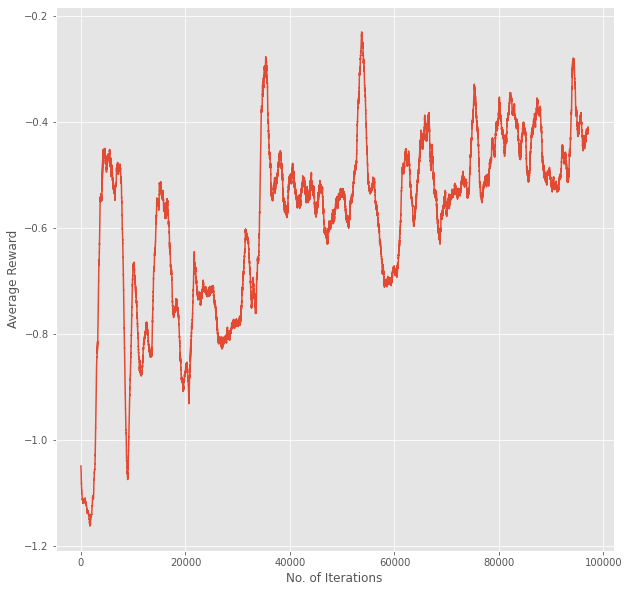

In [ ]:
avg_reward2=[]
r=0

drange=500
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

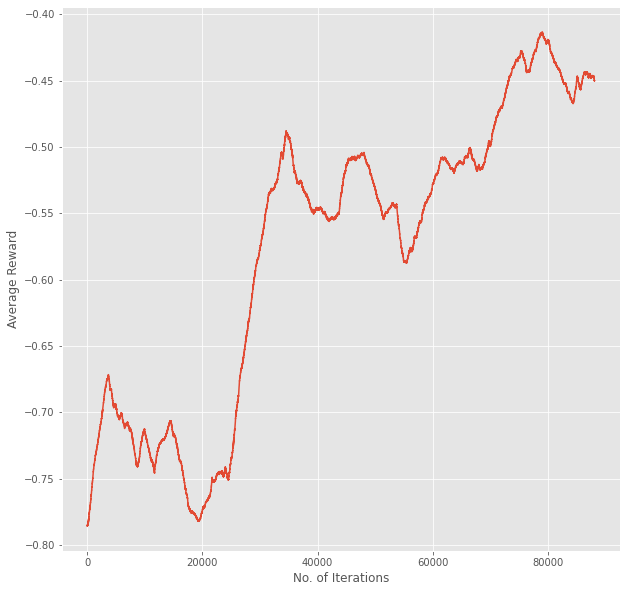

In [ ]:
avg_reward2=[]
r=0

drange=5000
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

In [ ]:
def epsilon_greedy_policy(q,state,epsilon):
  actions=8
  if random.uniform(0,1)<epsilon:
    return [random.randint(0,actions-1),random.randint(0,actions-1)]
  else:
    l=-100000000000
    index=[]
    for i in range(actions):
      for j in range(actions):
        if q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]>l:
          l=q[(state[0][0],state[0][1],state[1][0],state[1][1],i,j)]
          index=[i,j]
  return index

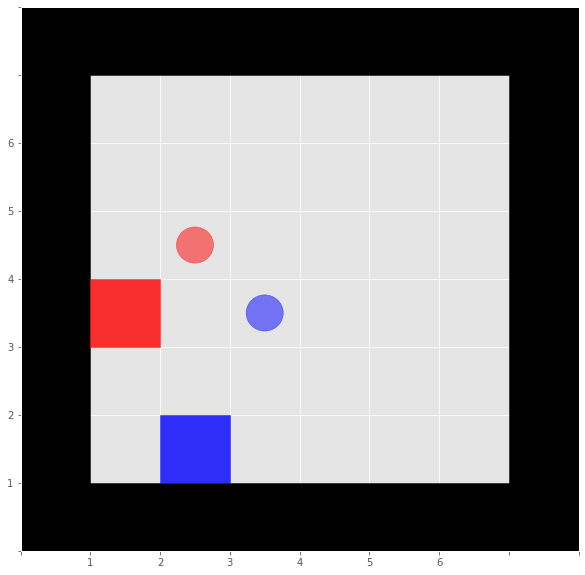

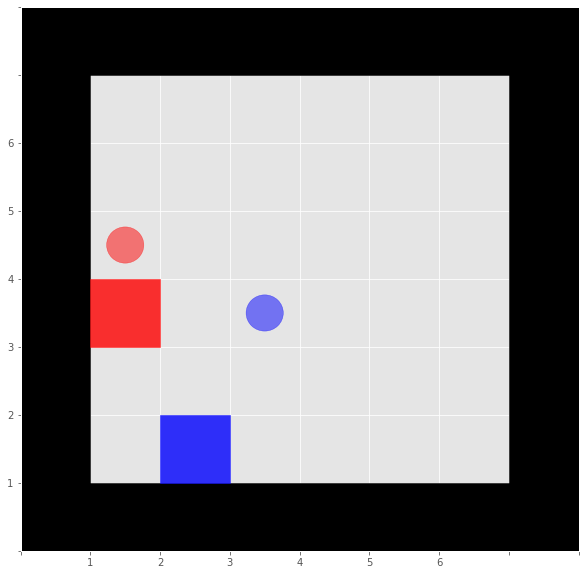

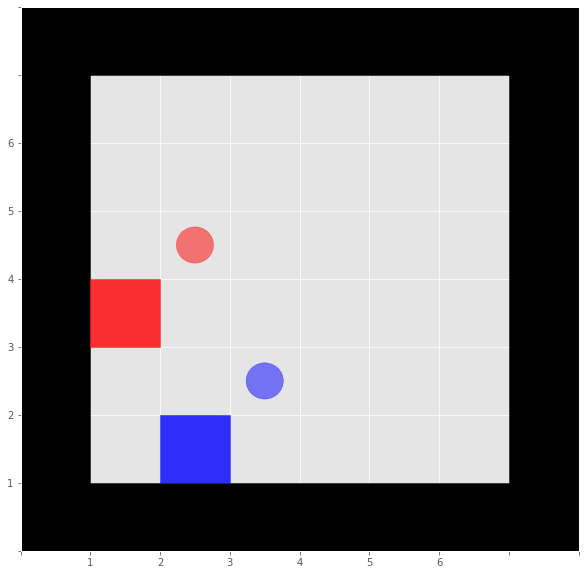

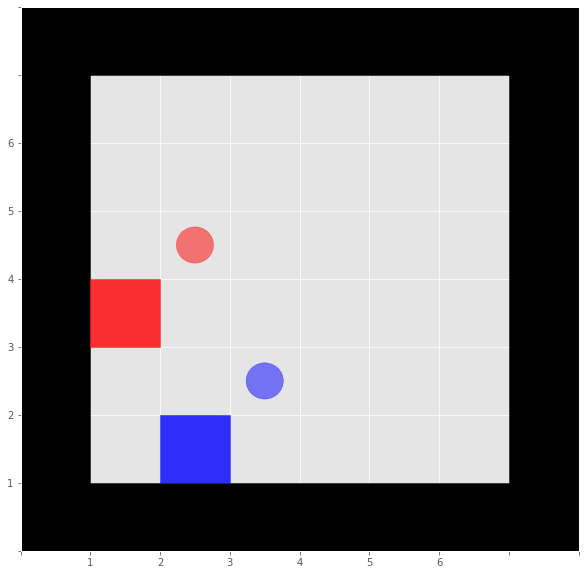

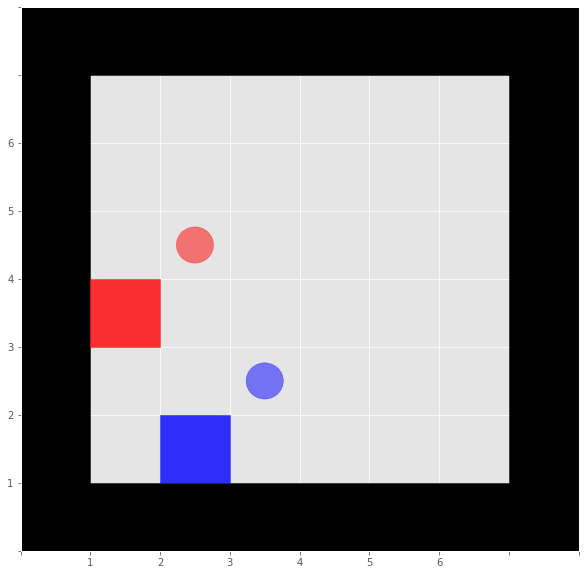

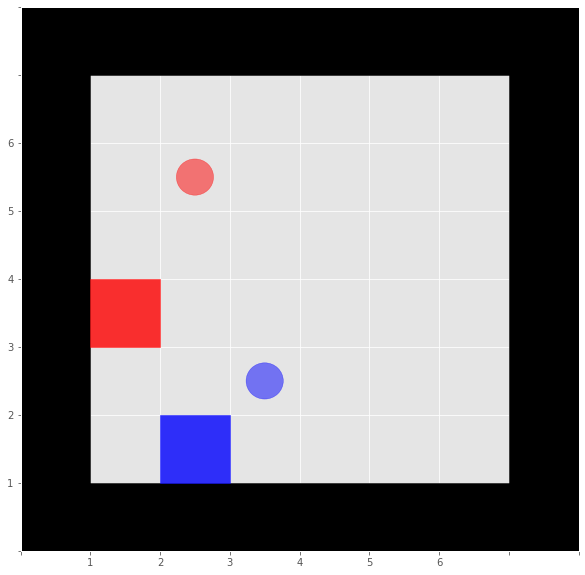

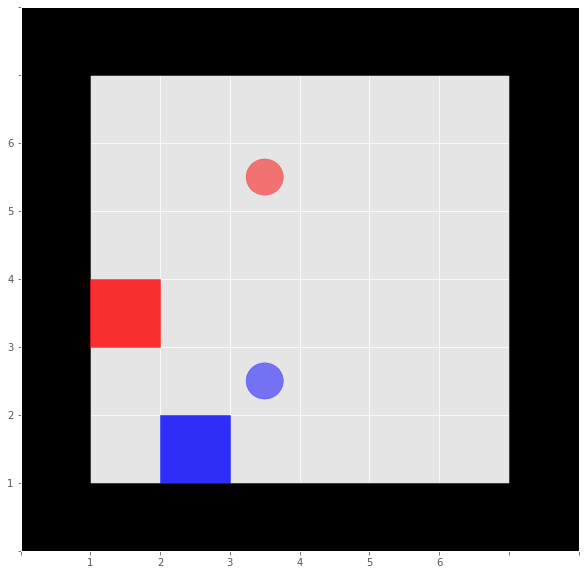

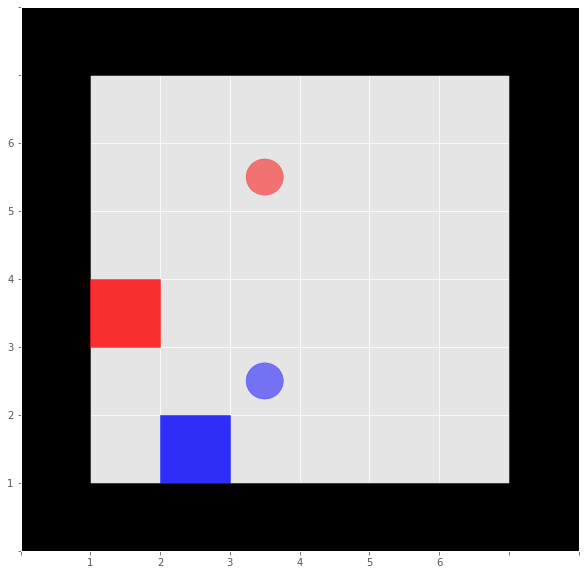

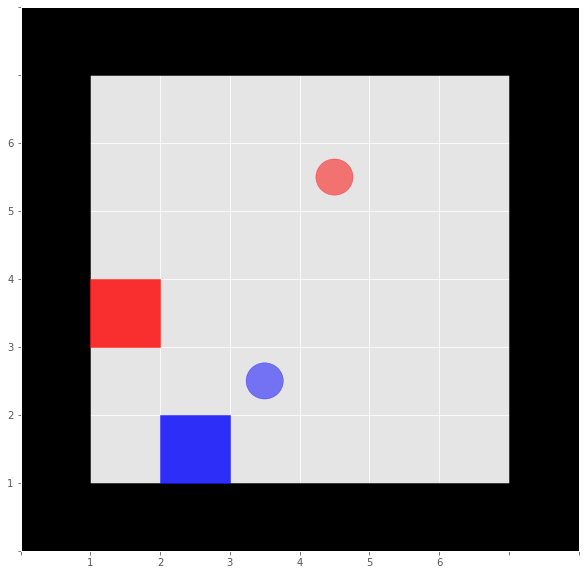

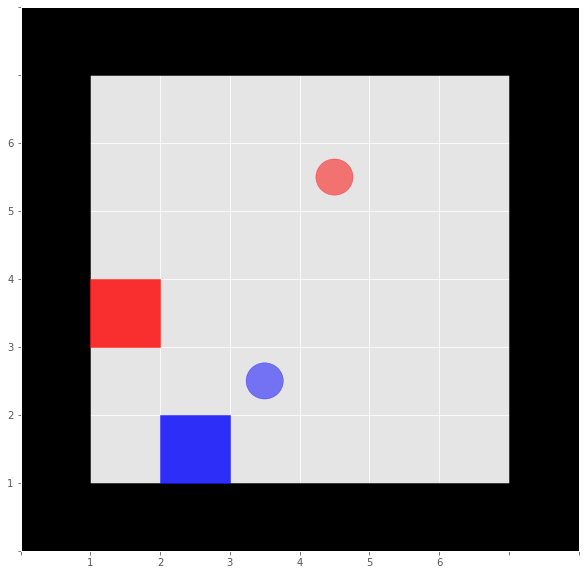

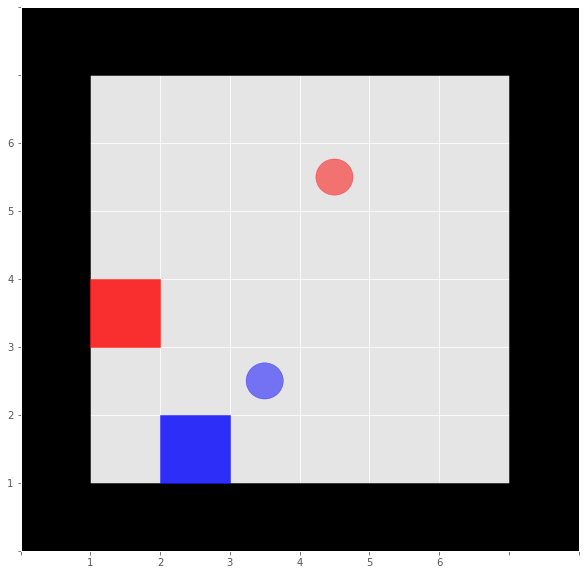

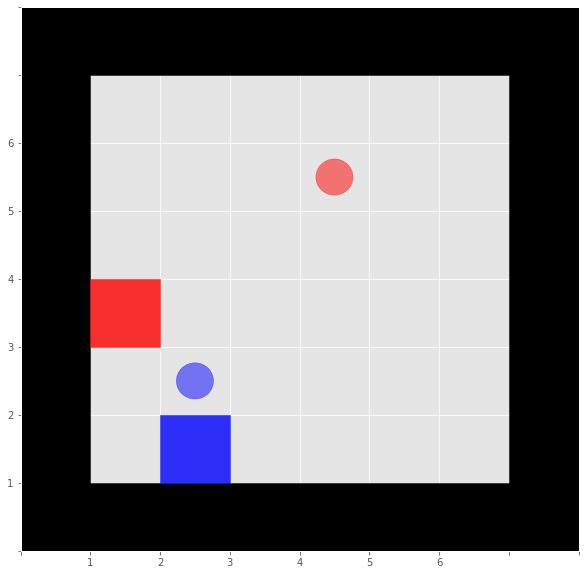

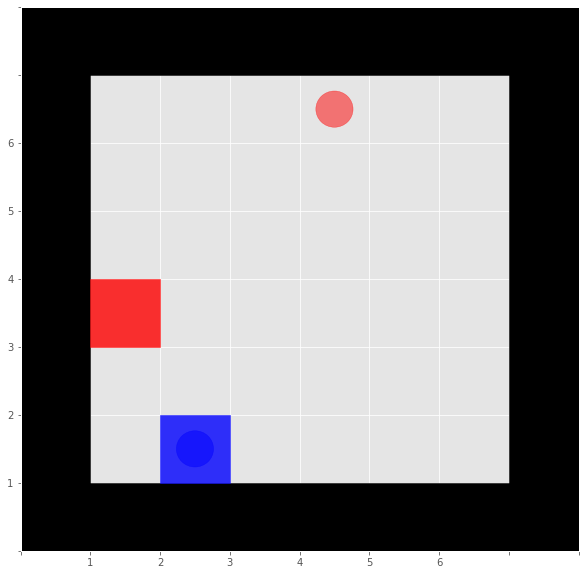

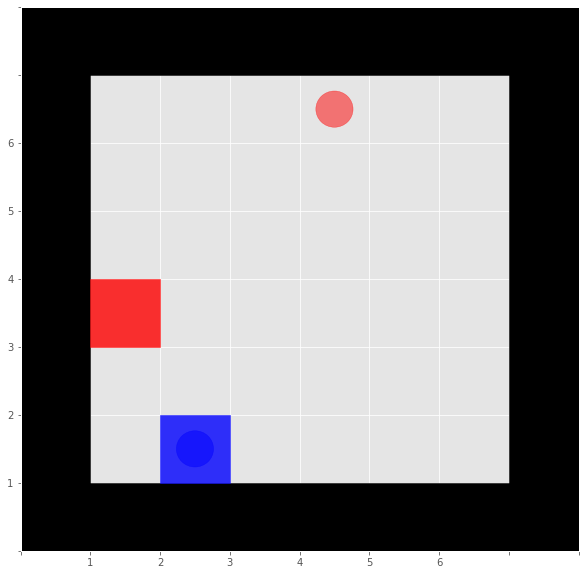

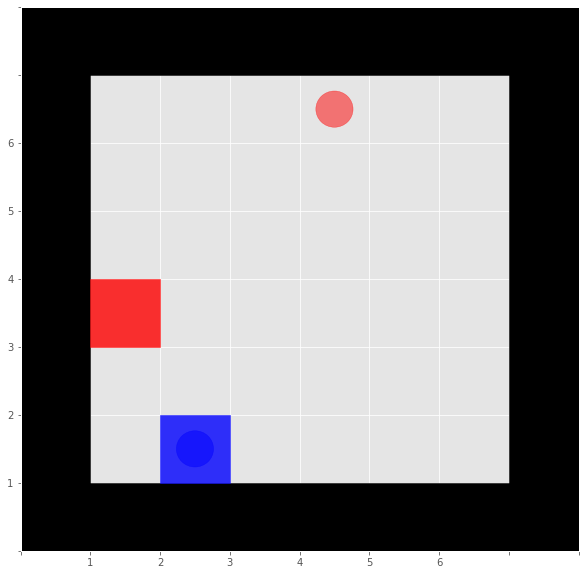

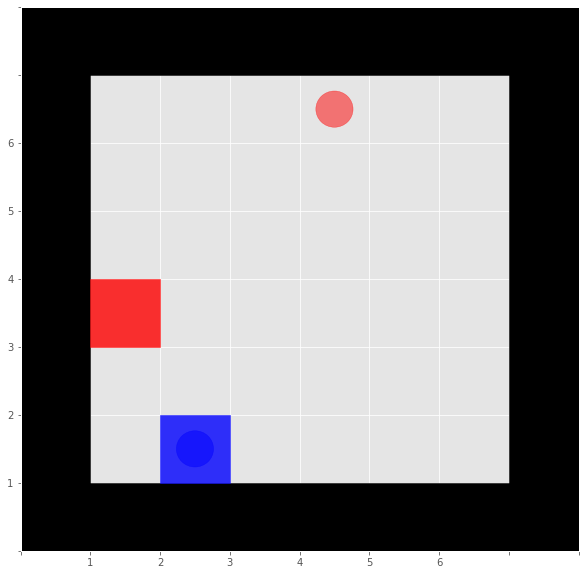

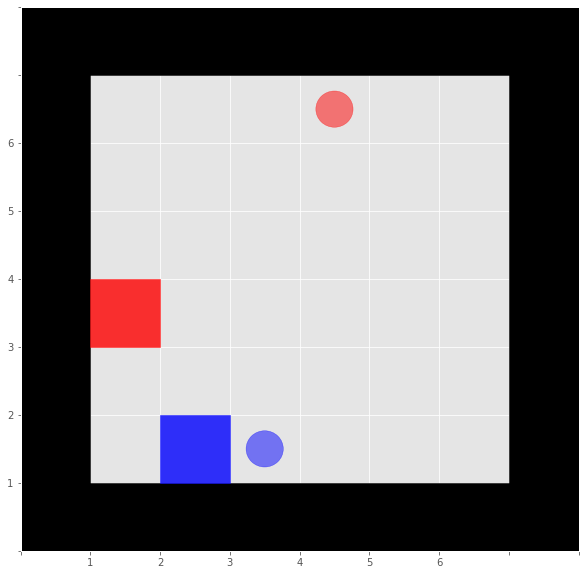

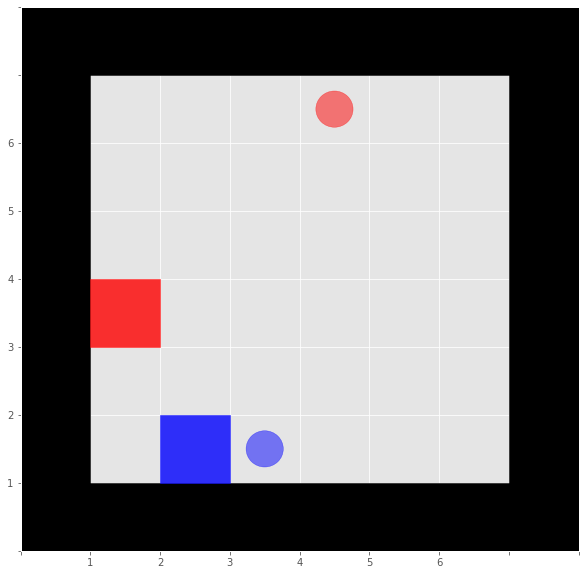

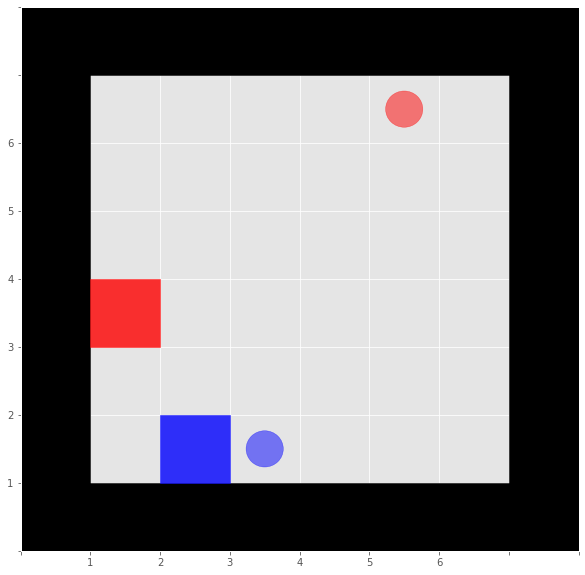

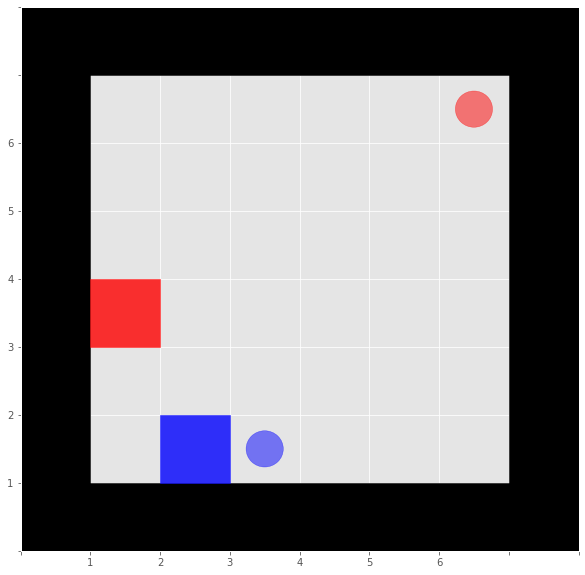

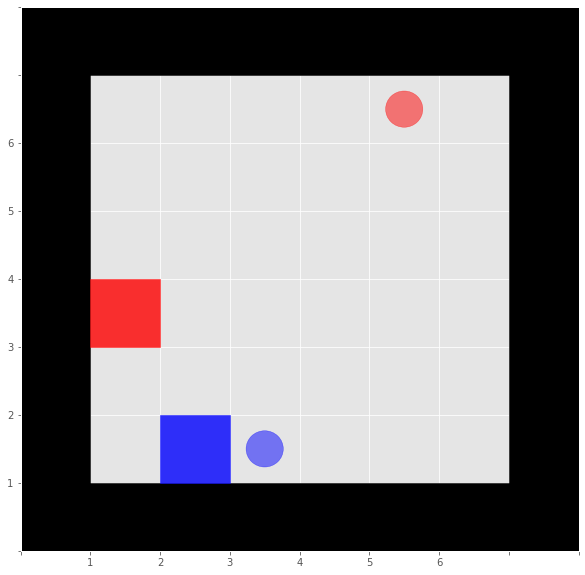

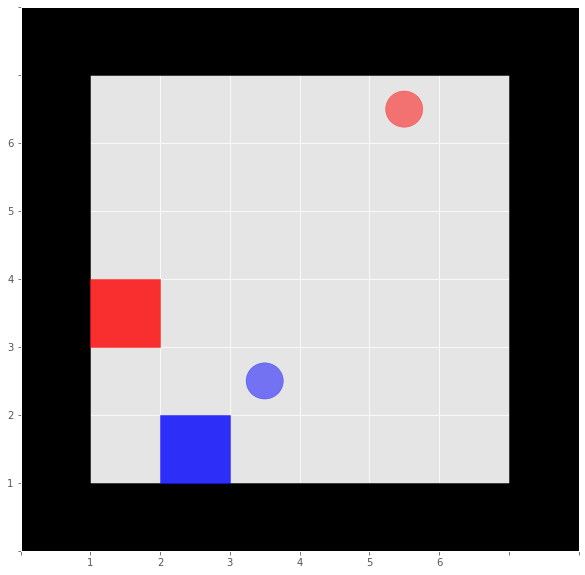

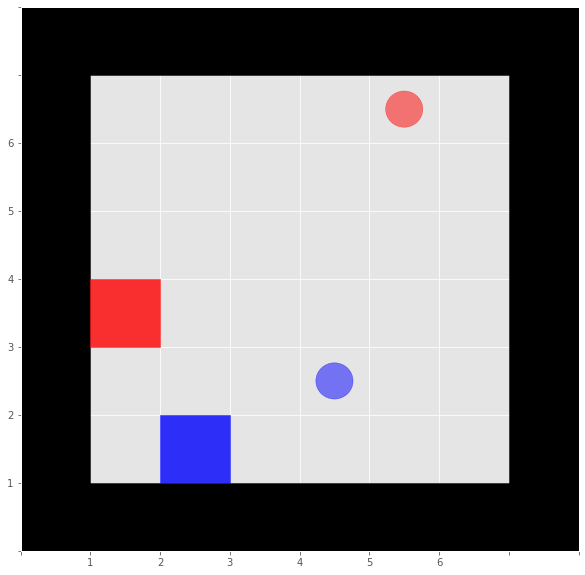

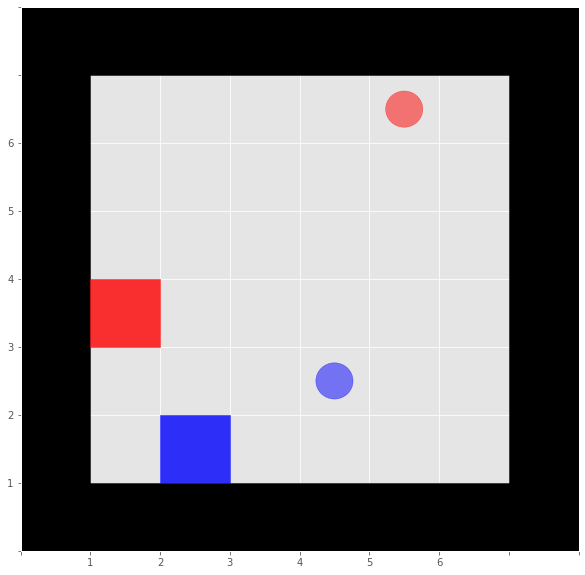

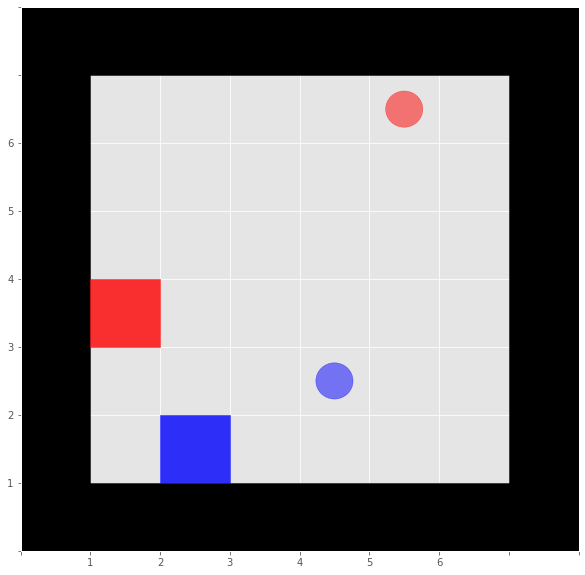

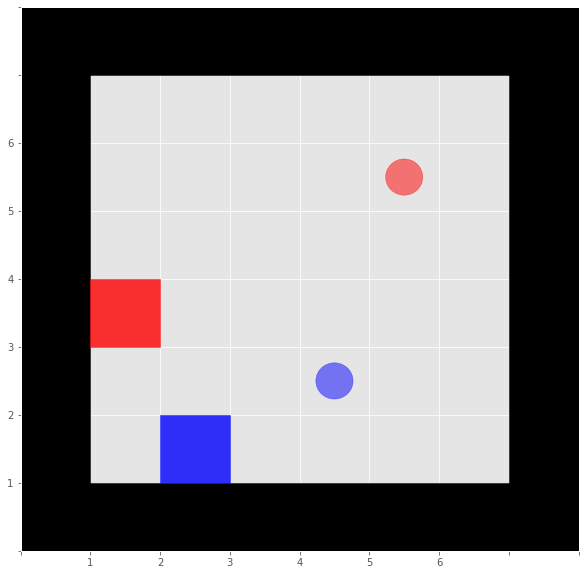

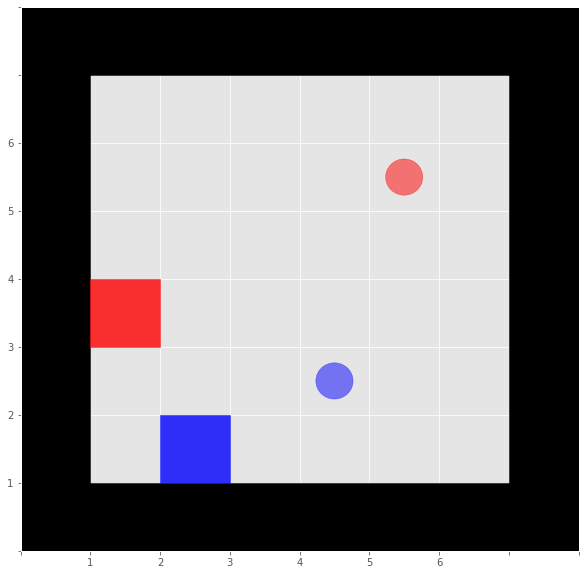

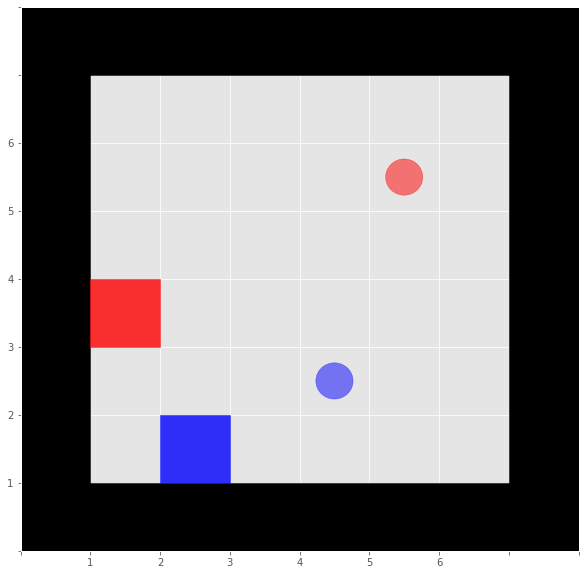

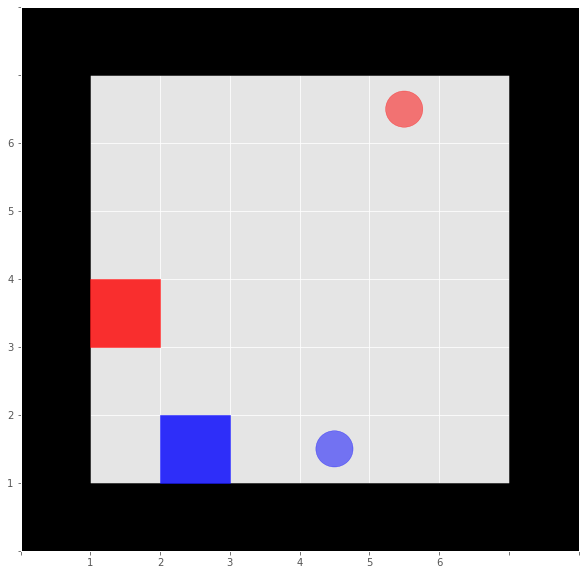

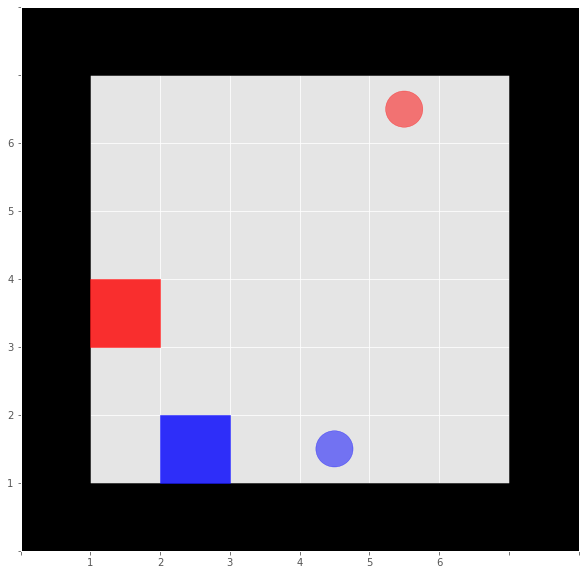

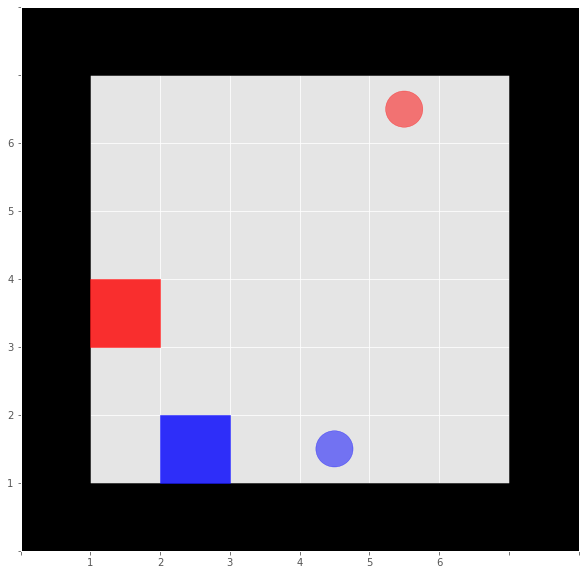

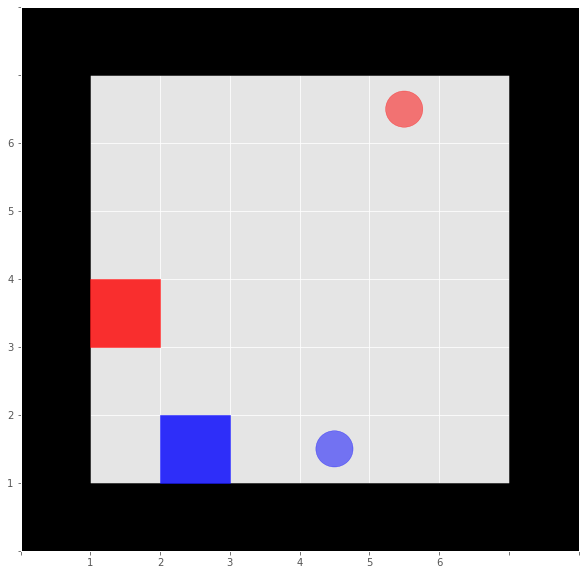

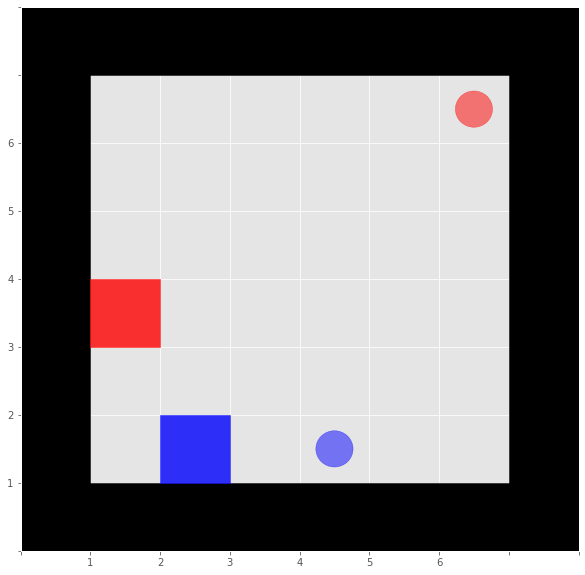

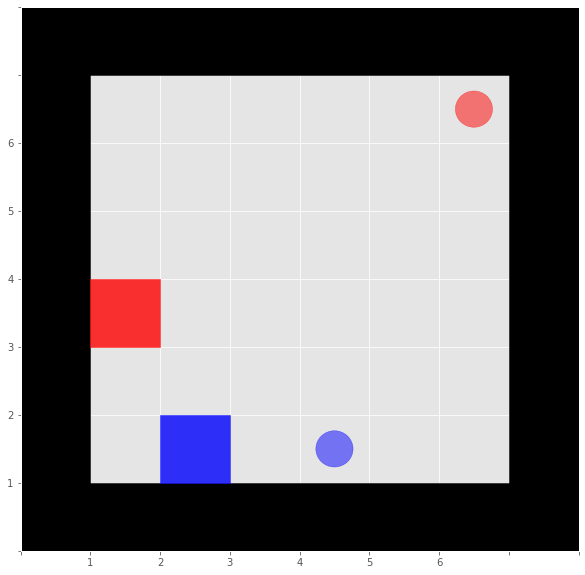

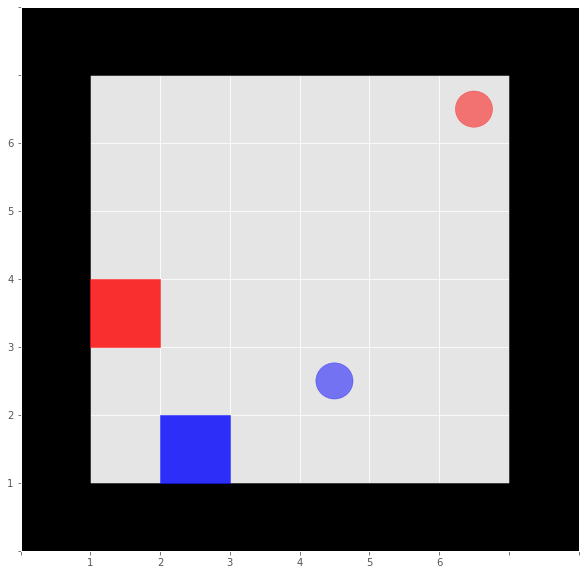

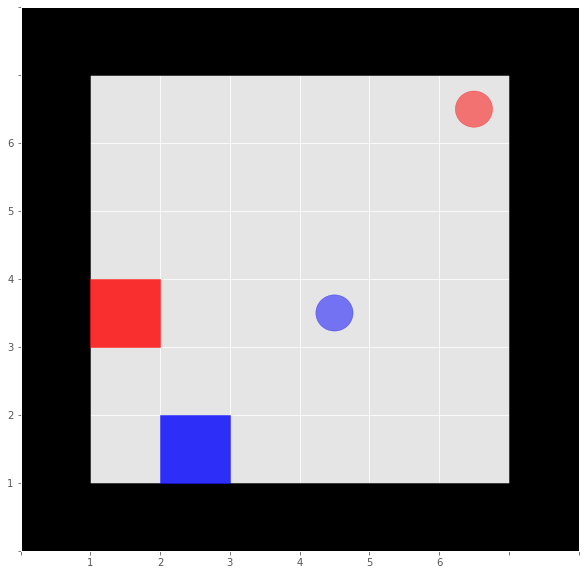

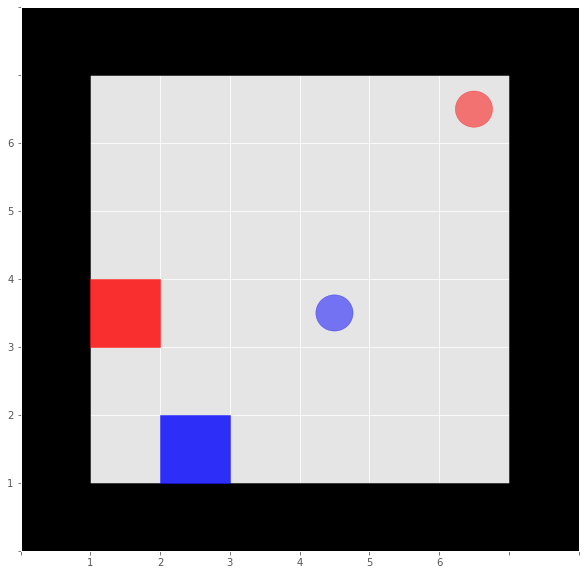

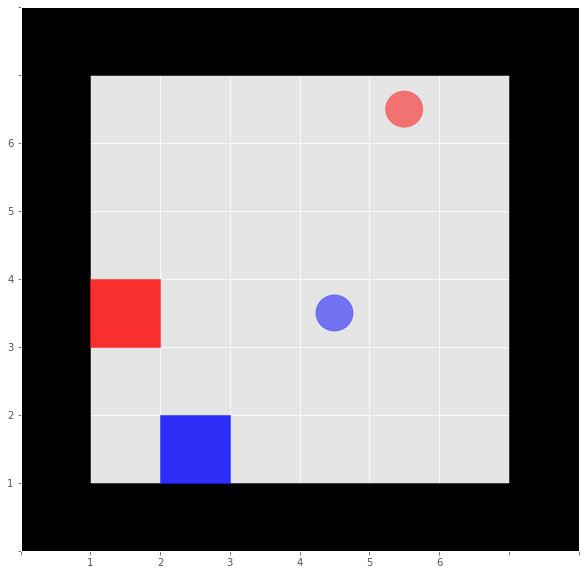

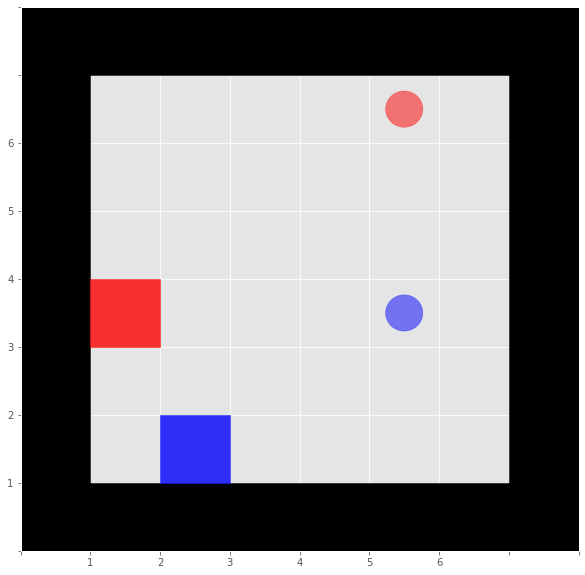

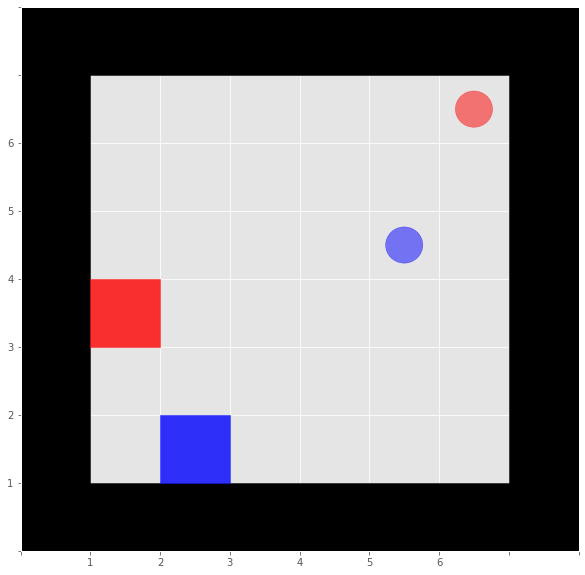

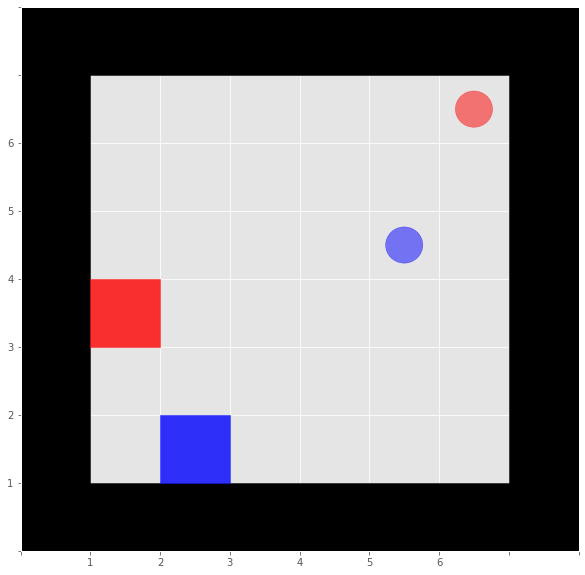

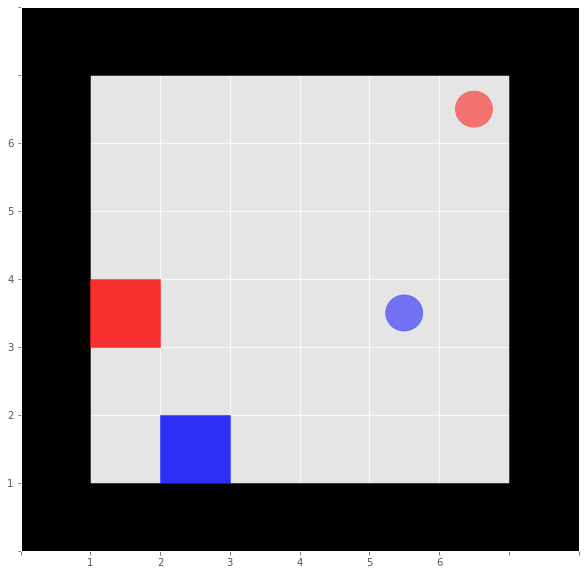

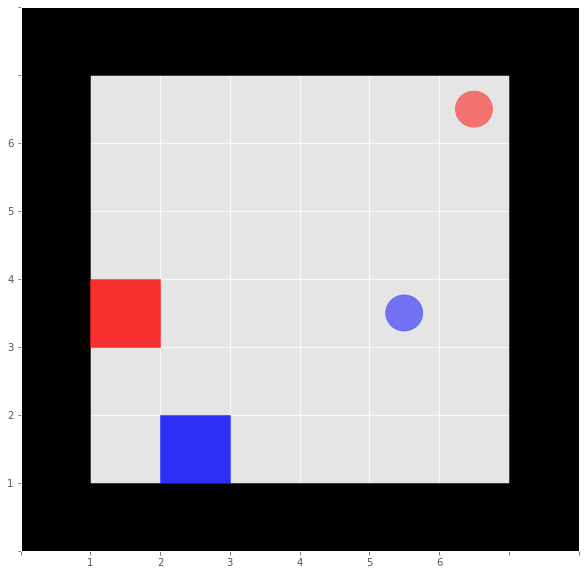

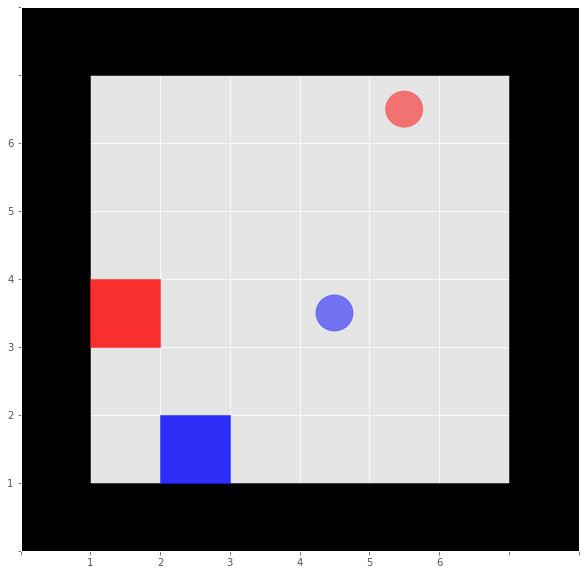

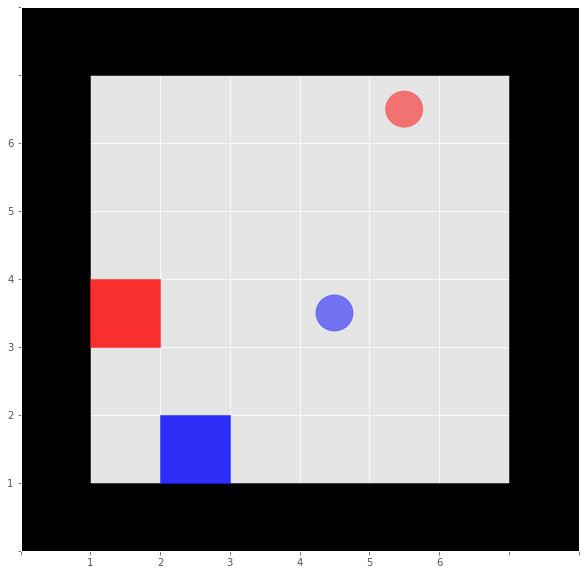

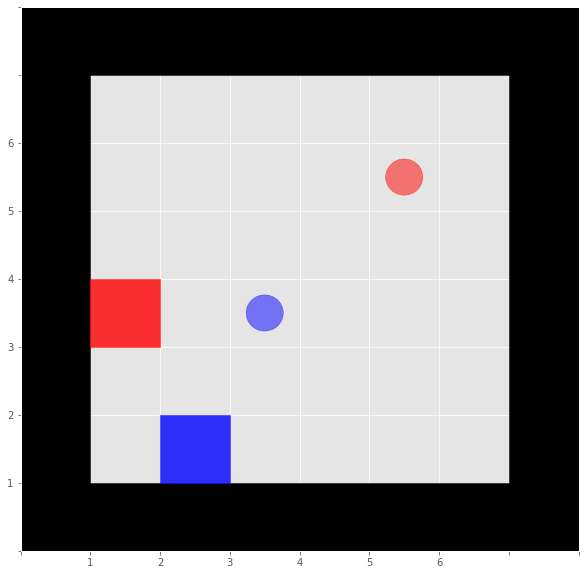

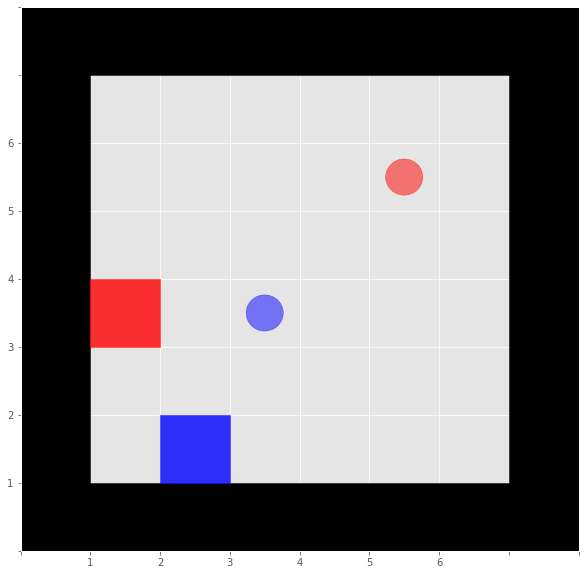

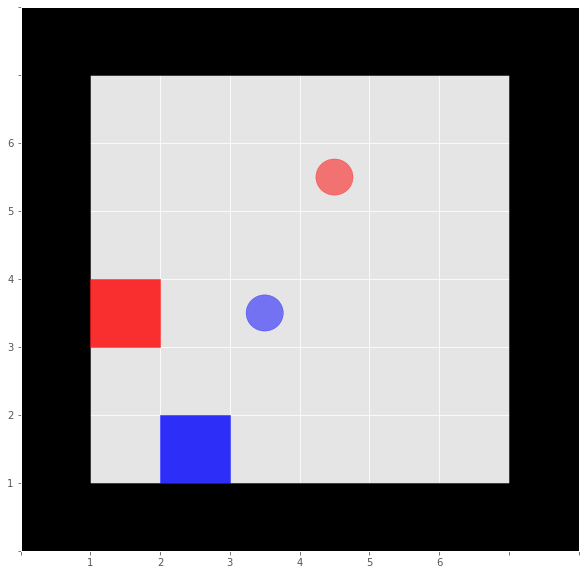

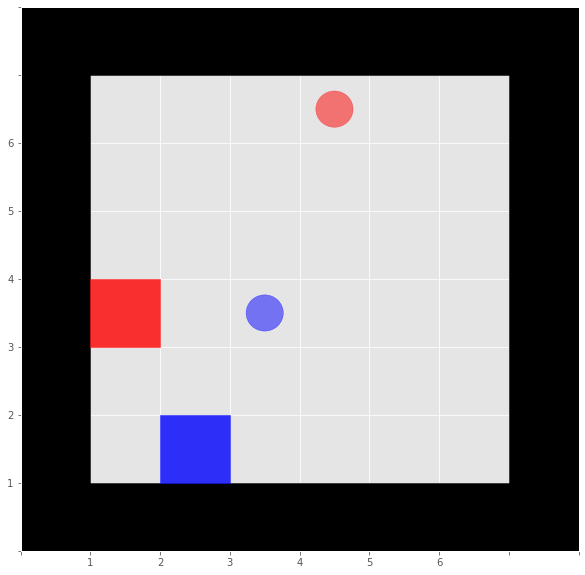

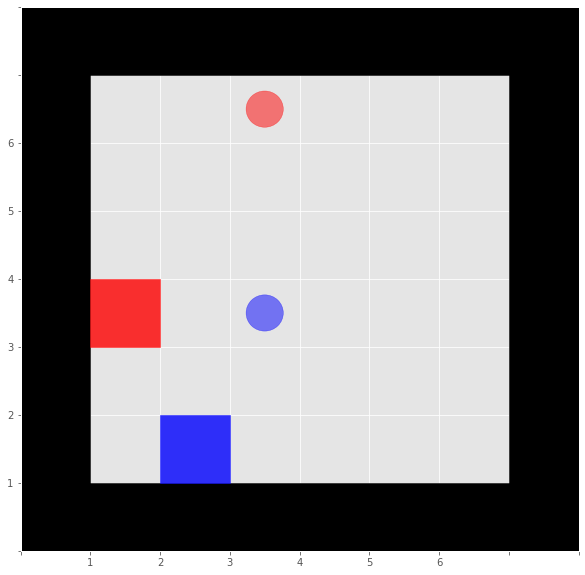

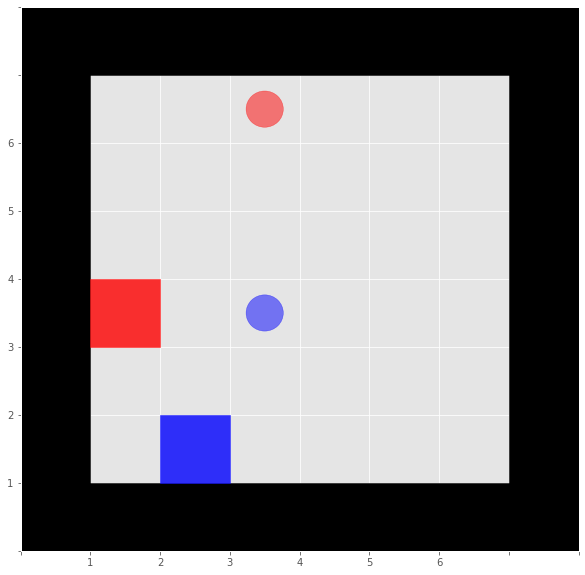

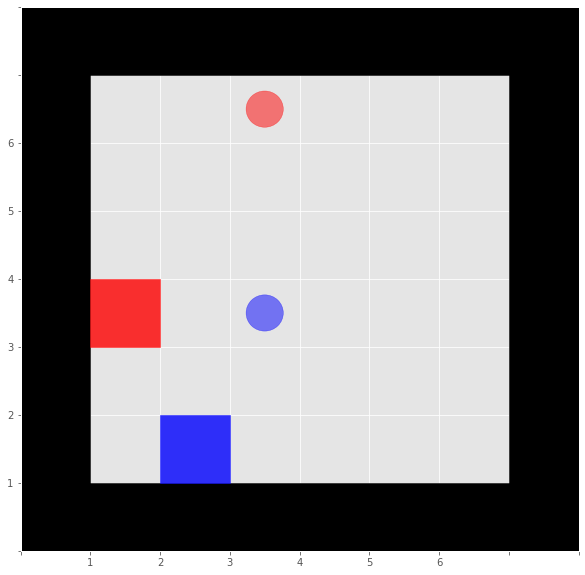

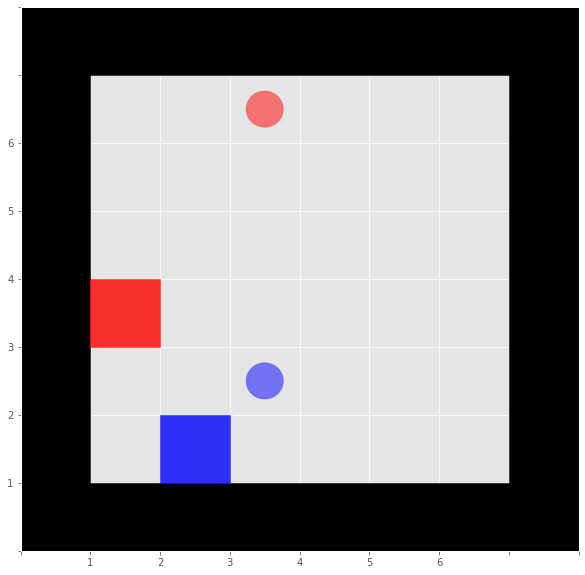

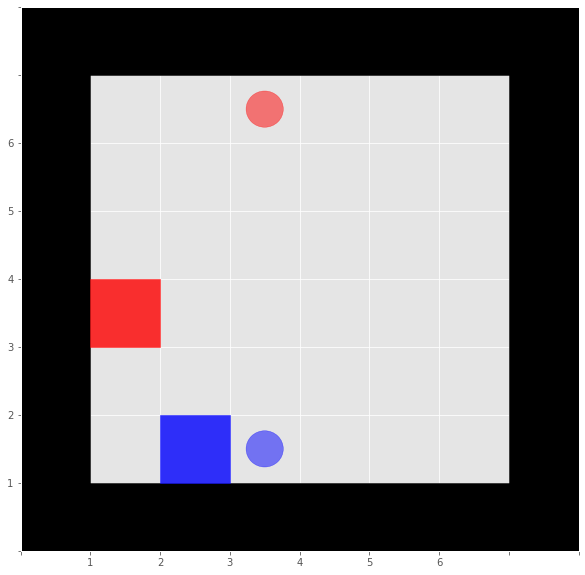

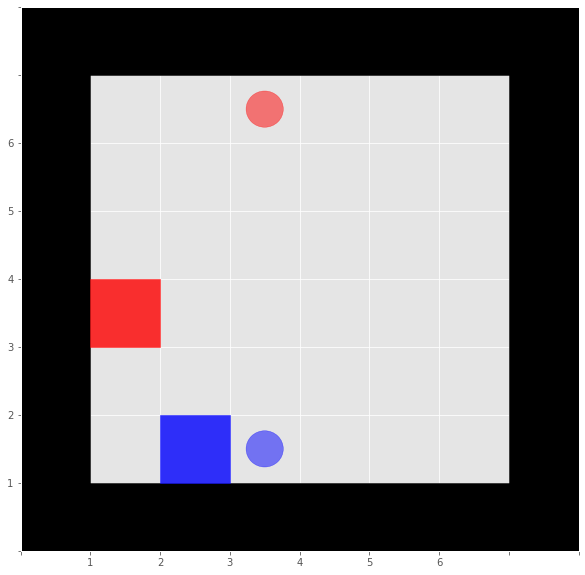

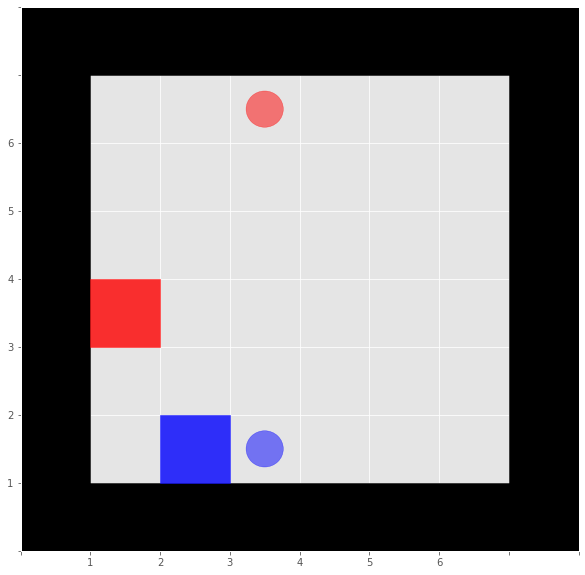

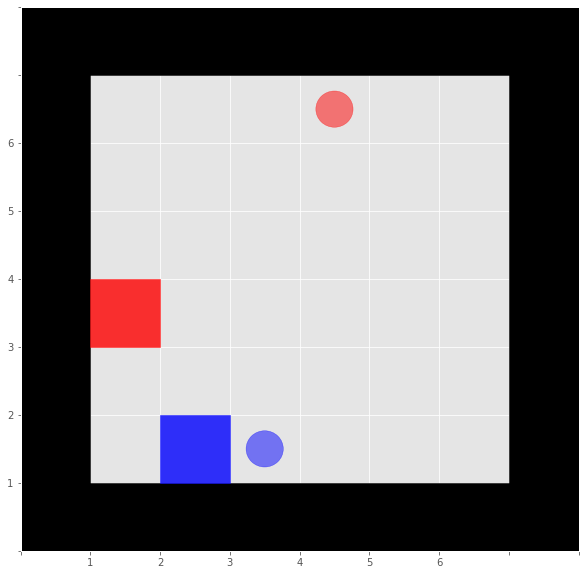

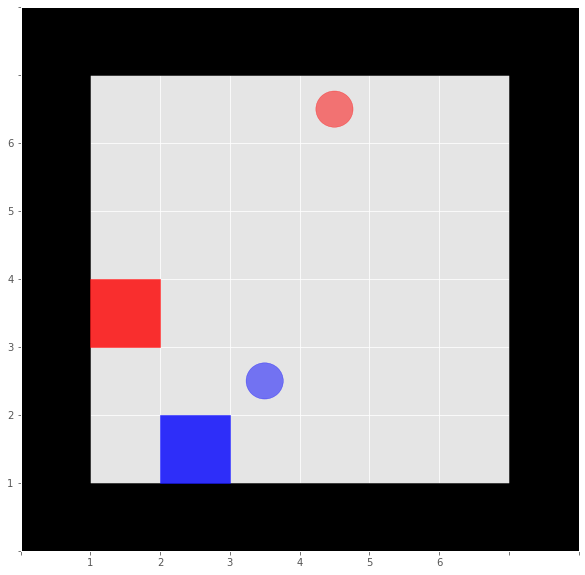

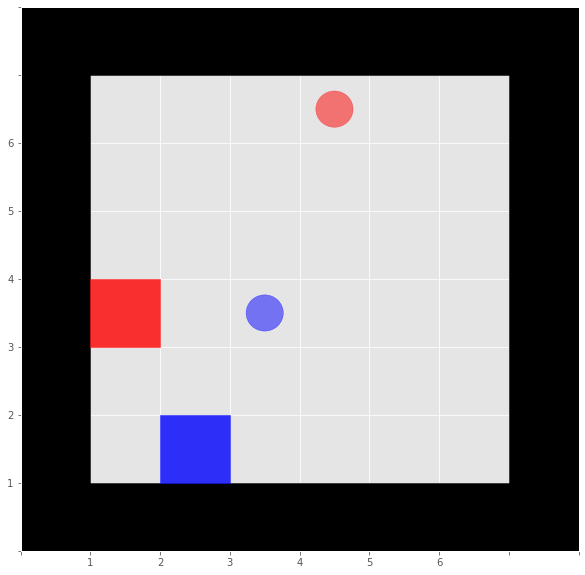

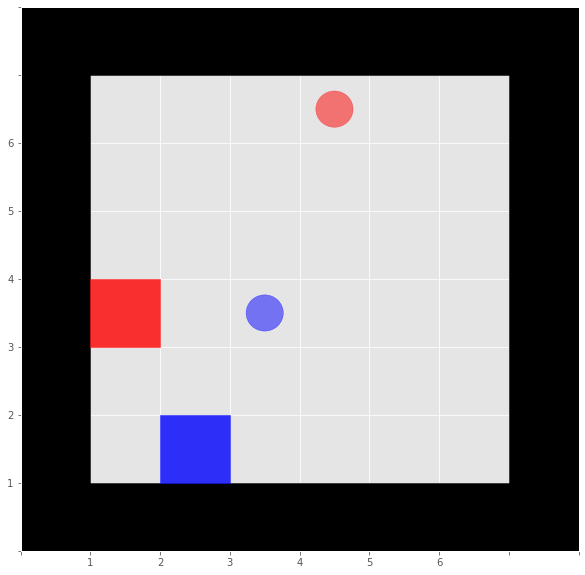

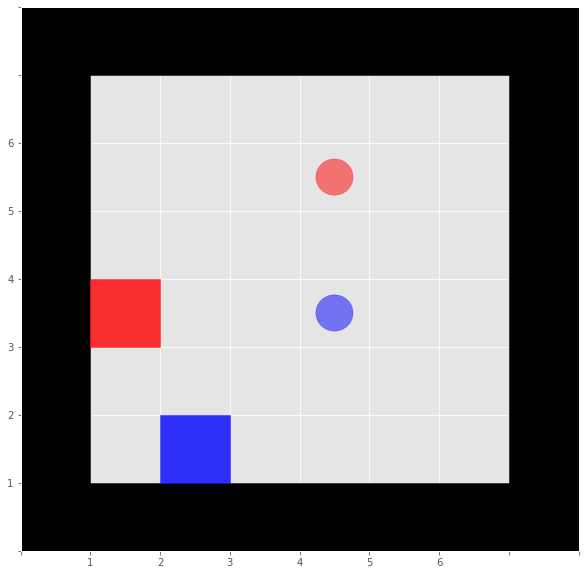

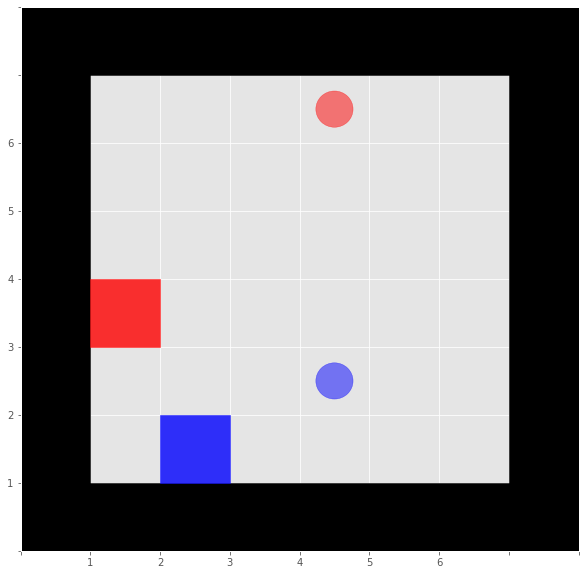

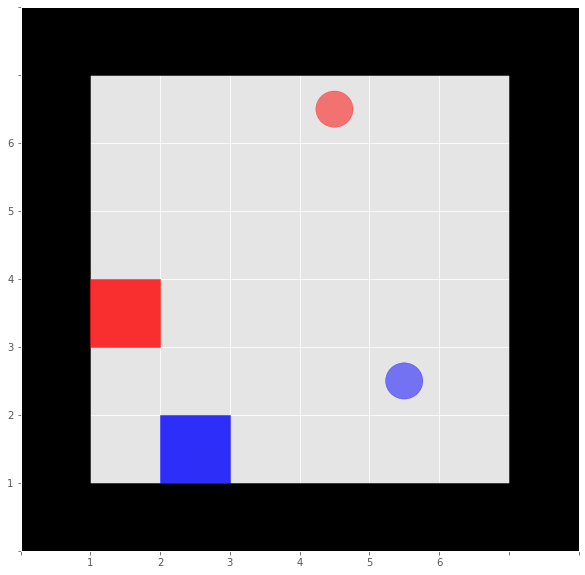

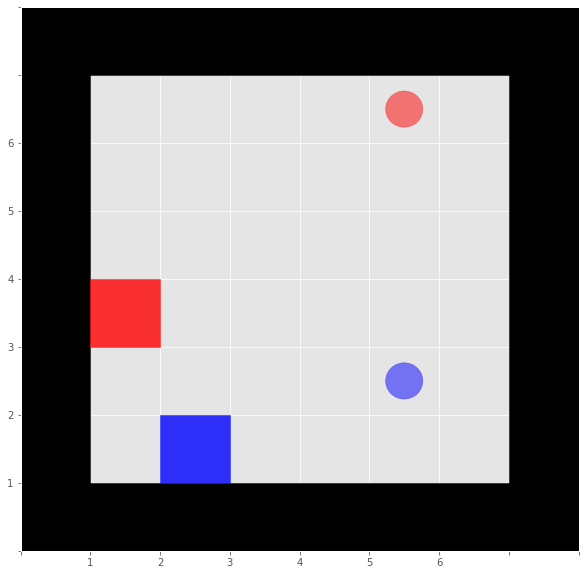

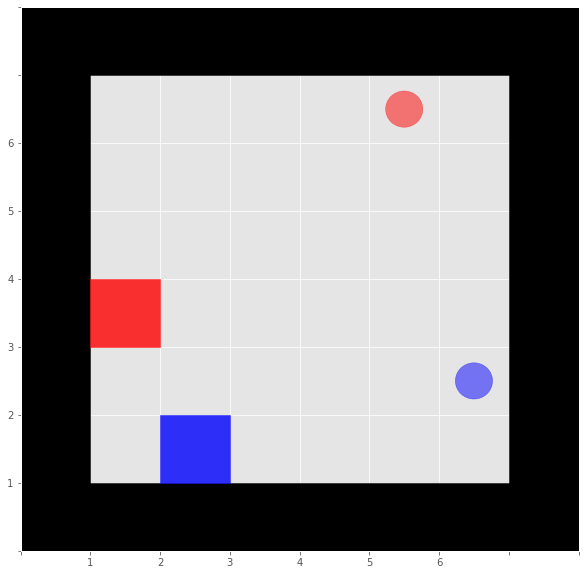

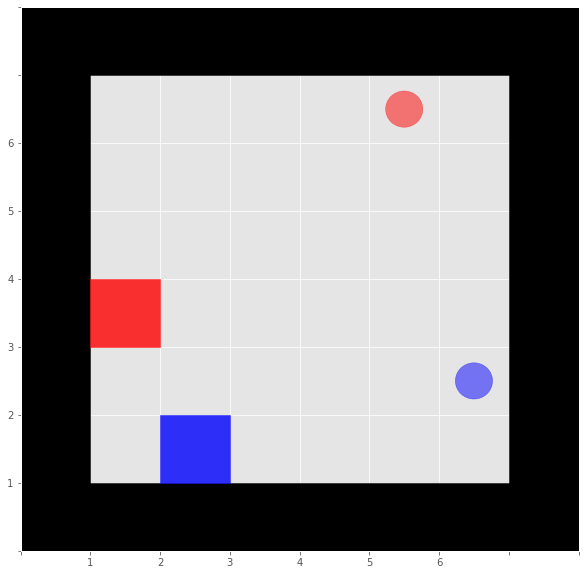

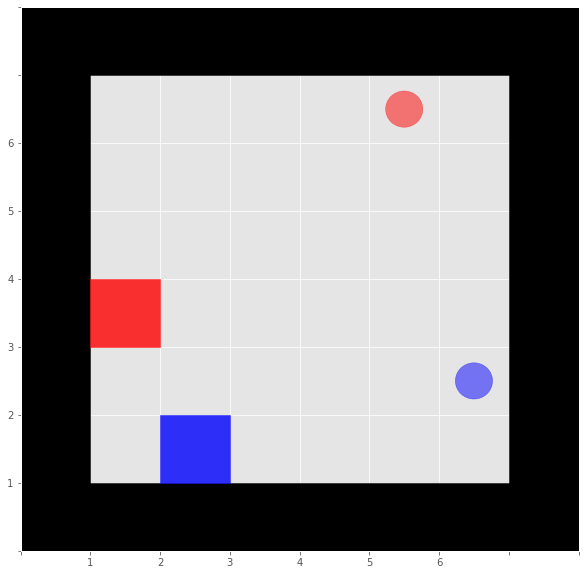

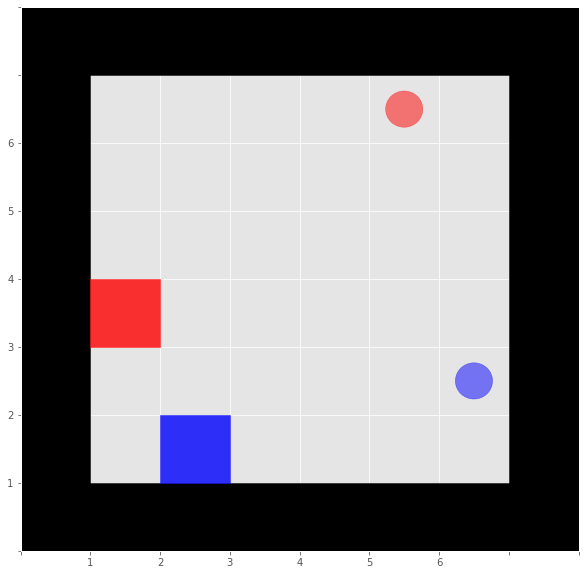

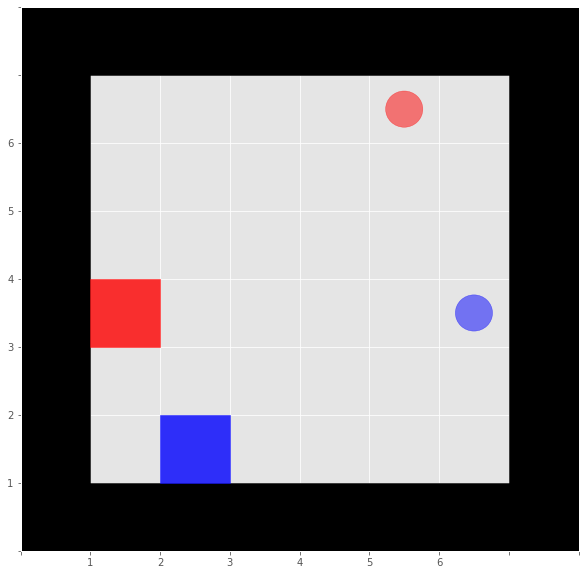

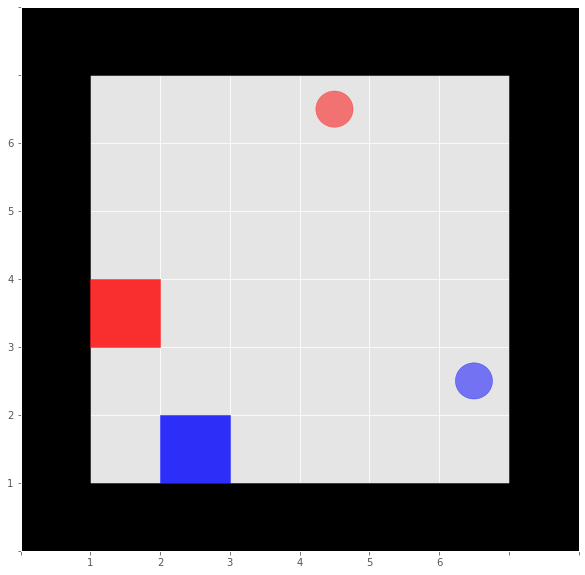

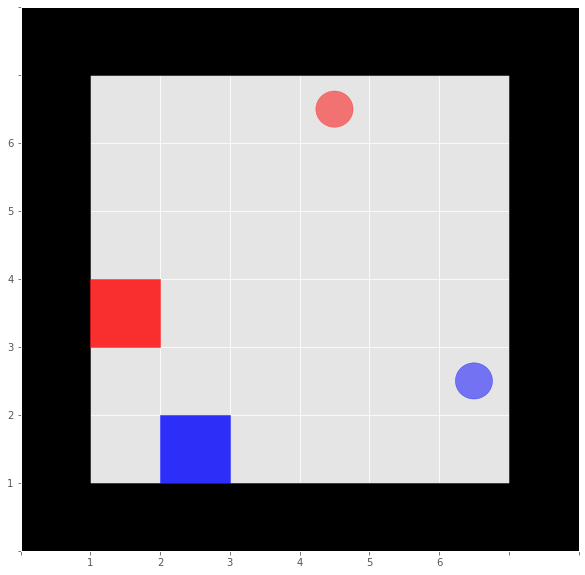

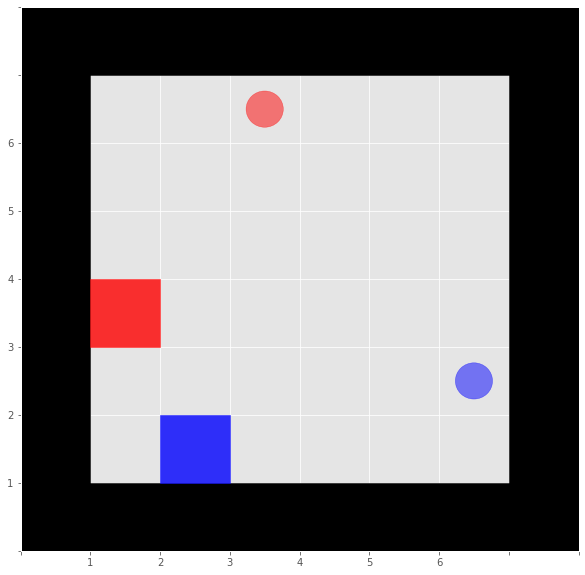

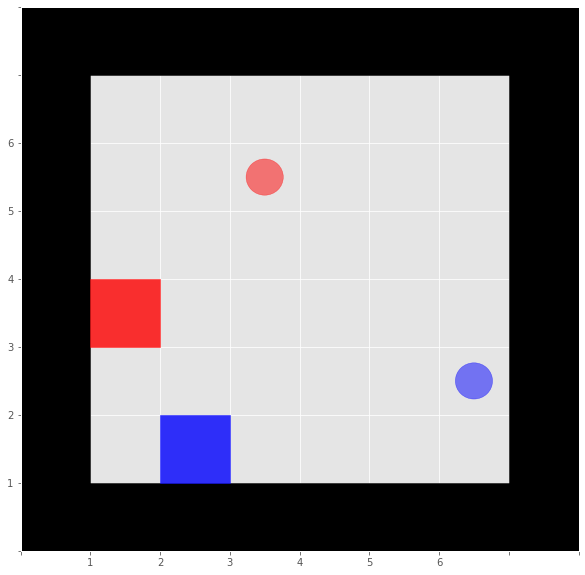

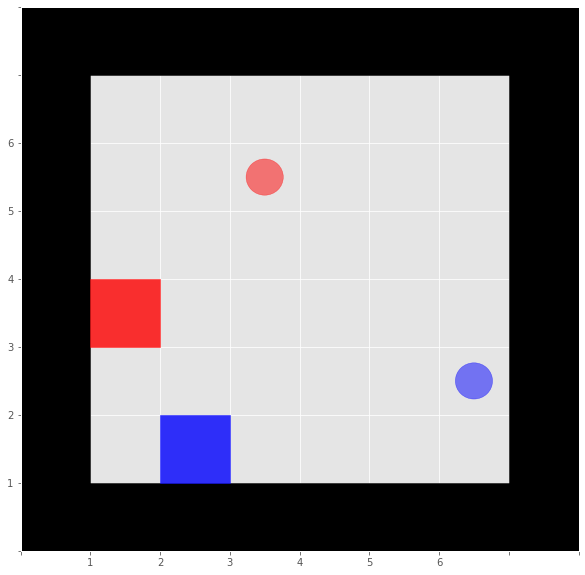

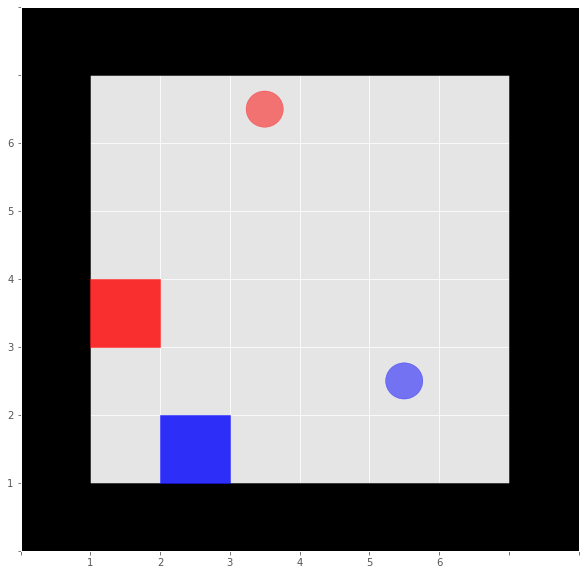

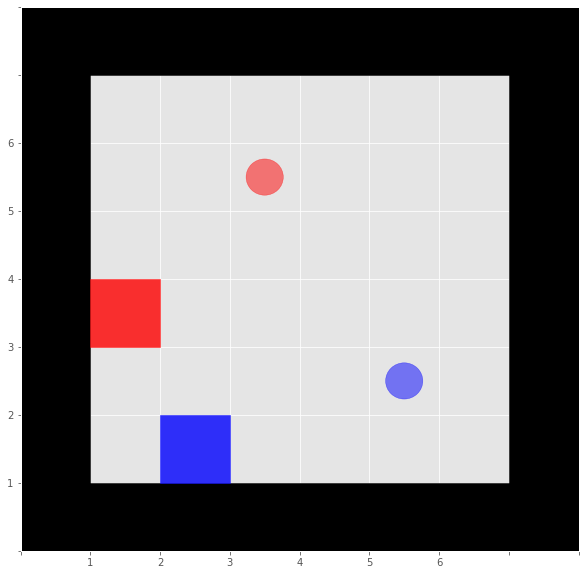

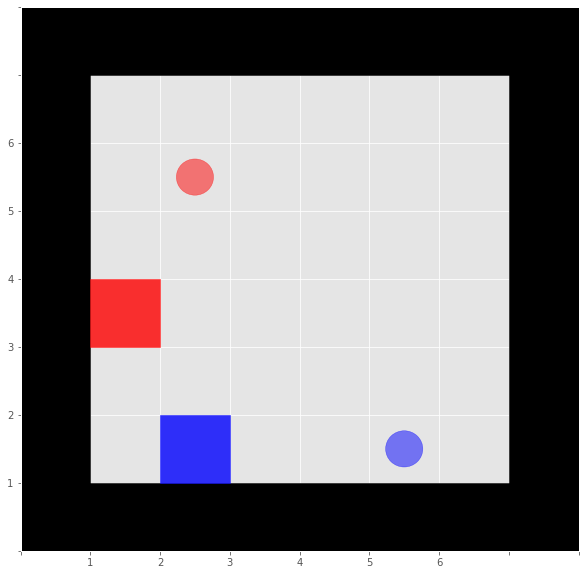

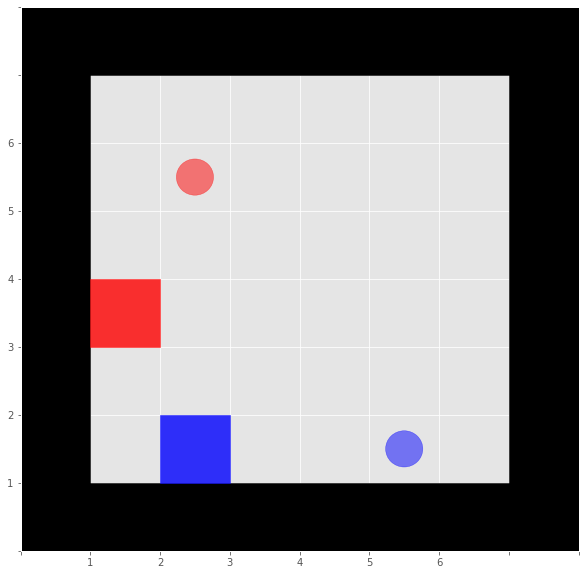

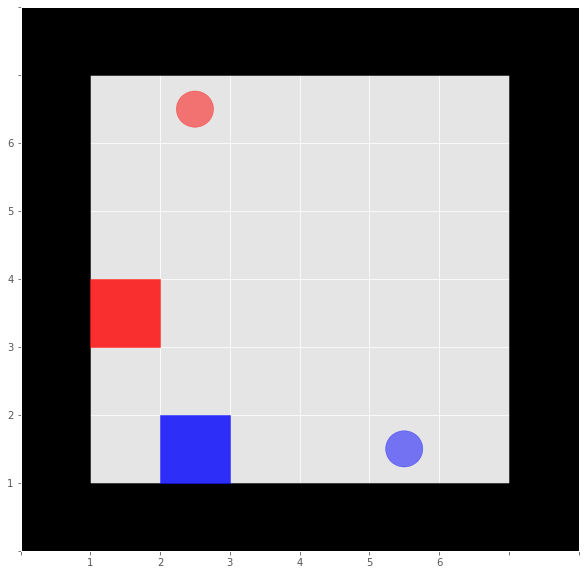

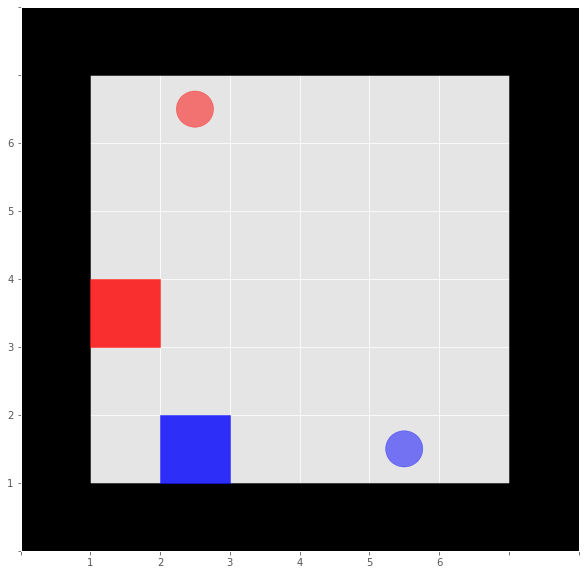

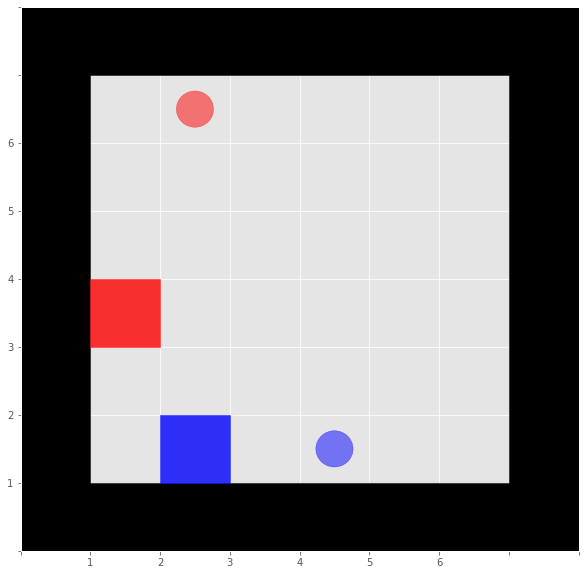

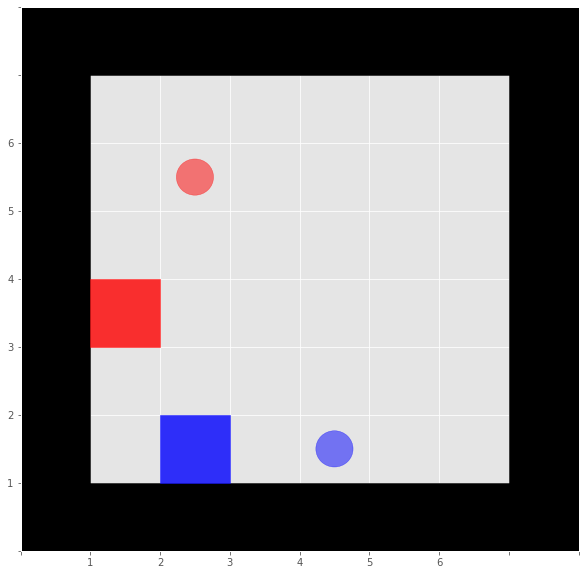

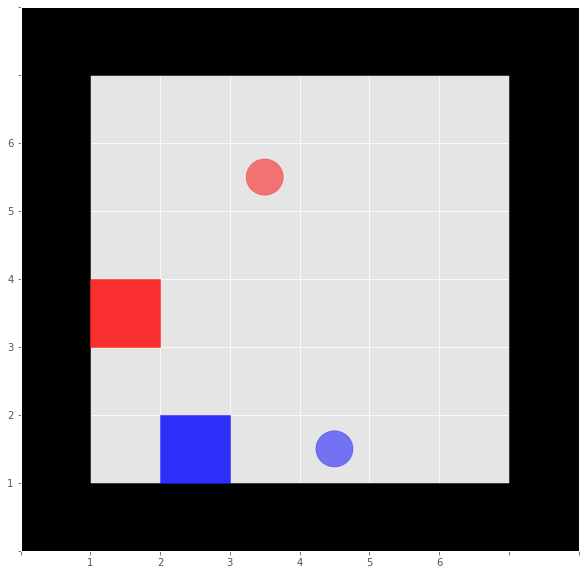

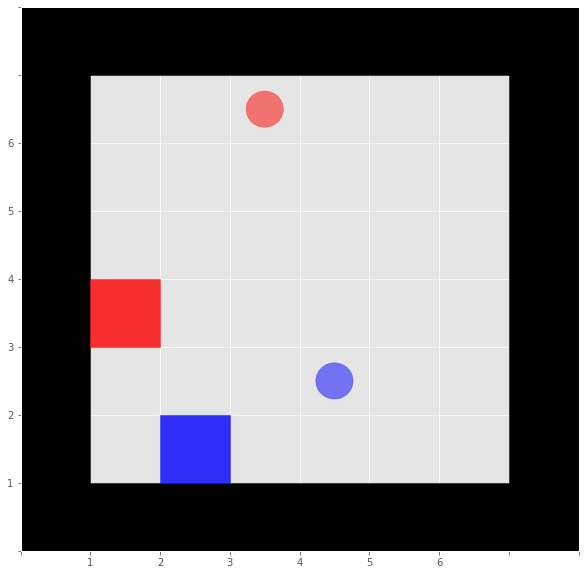

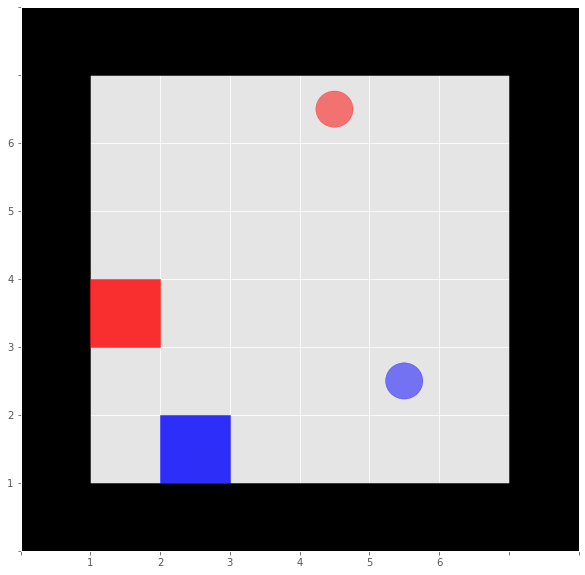

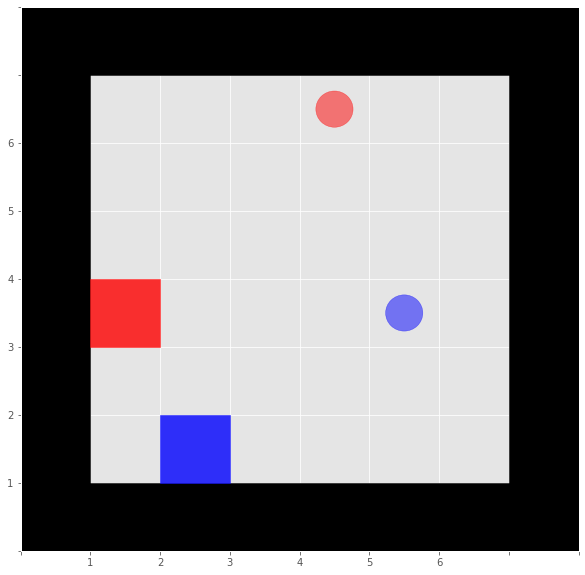

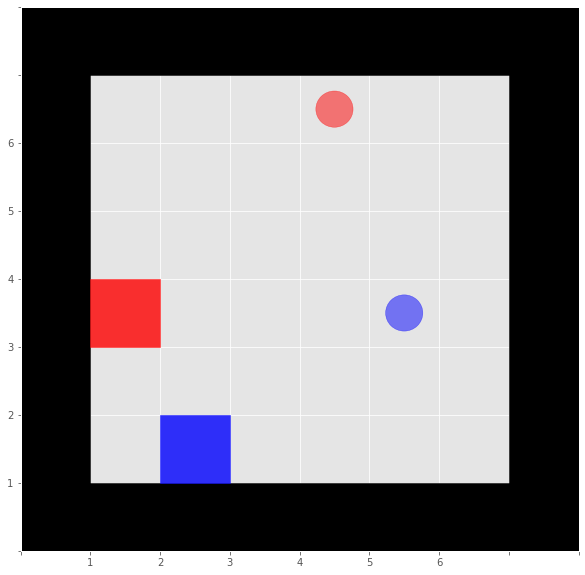

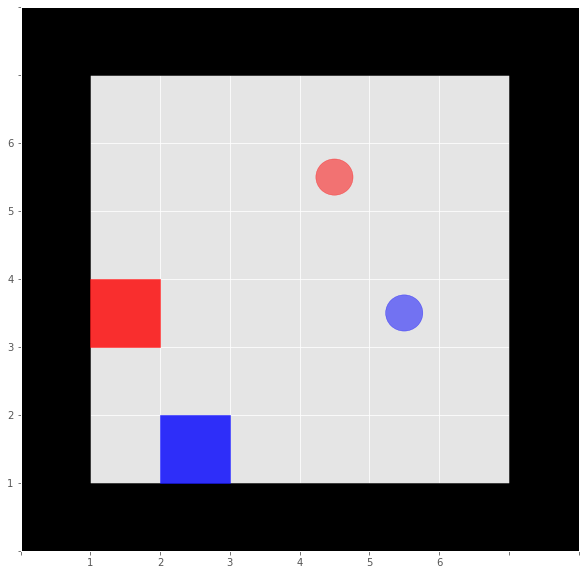

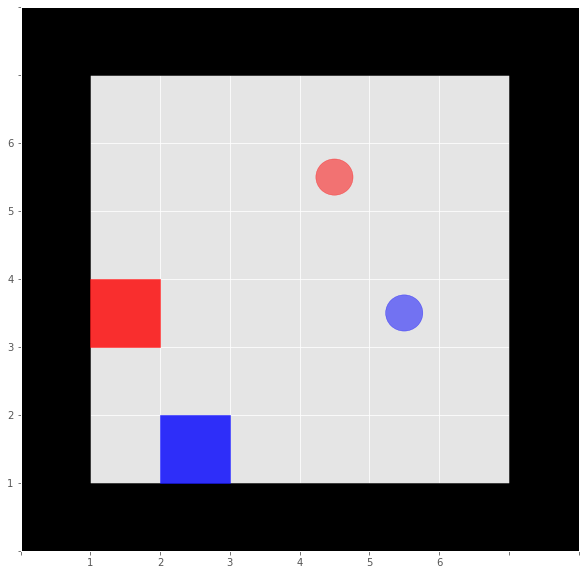

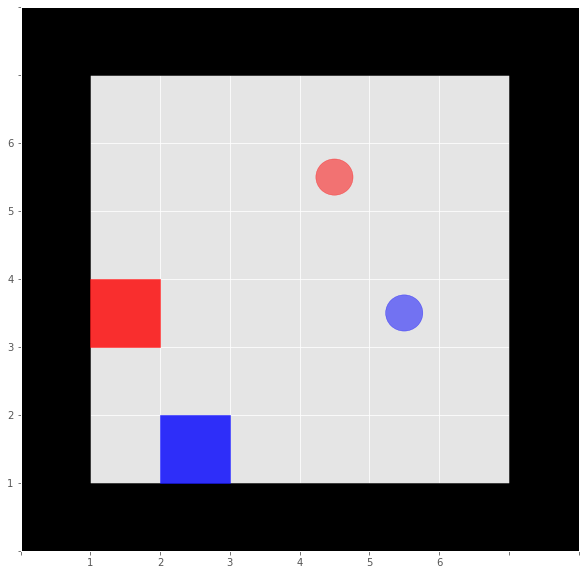

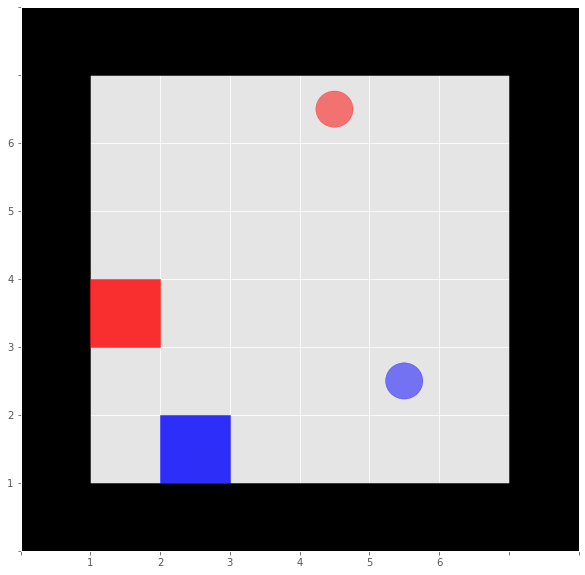

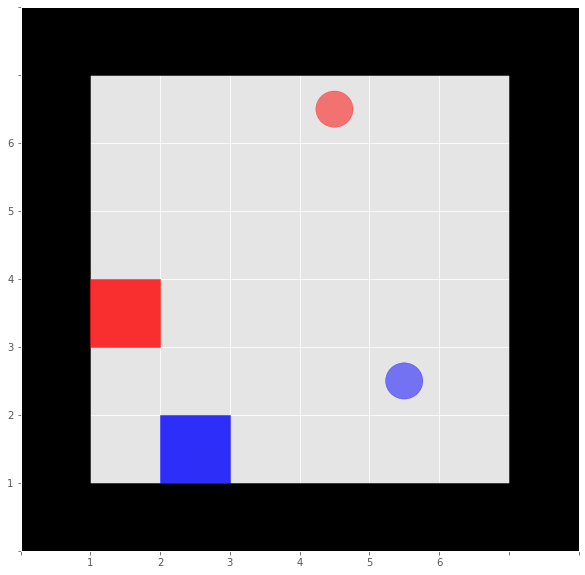

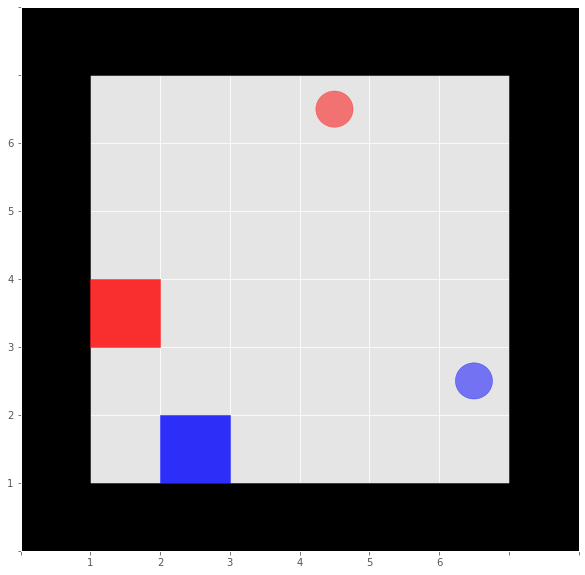

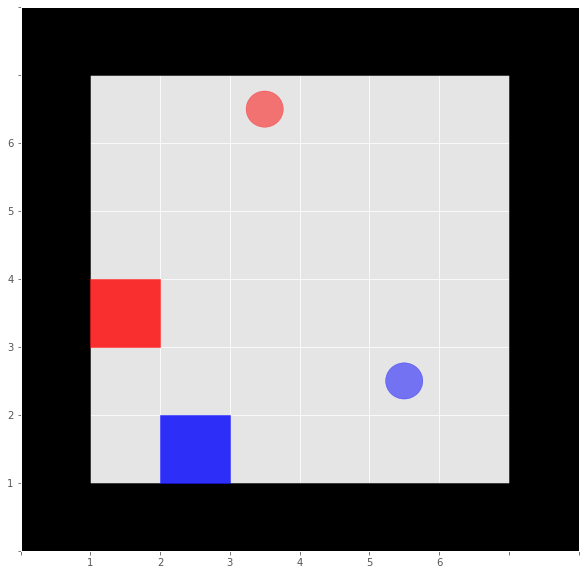

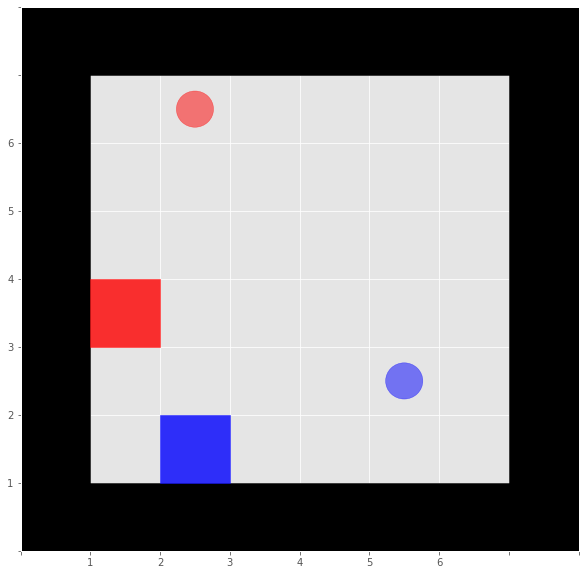

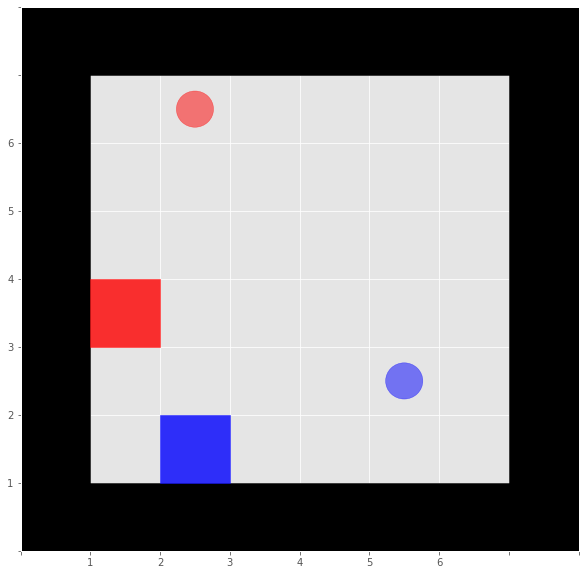

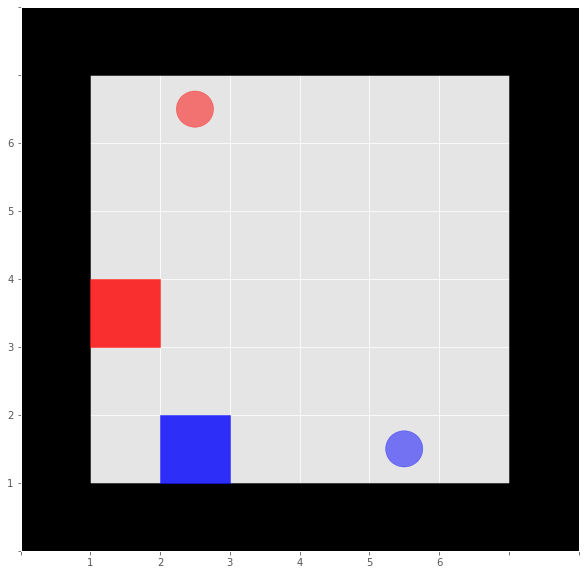

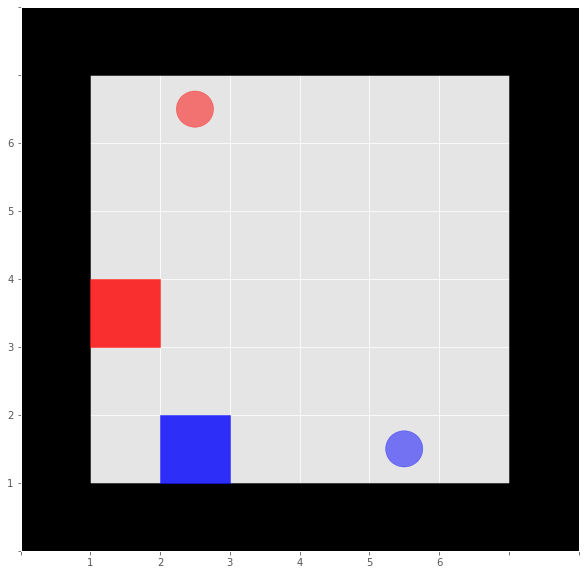

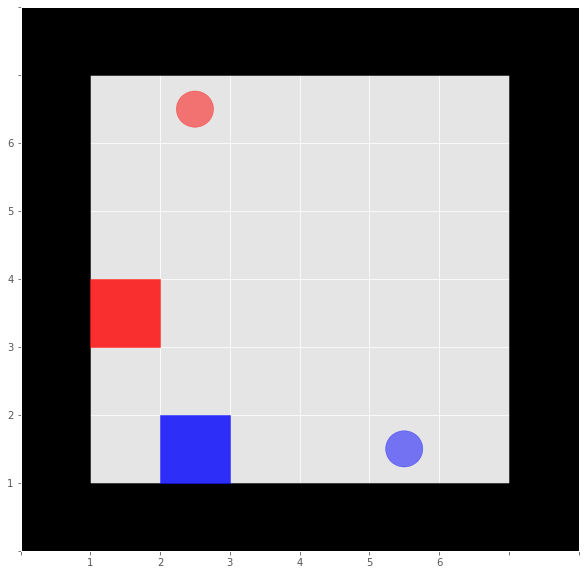

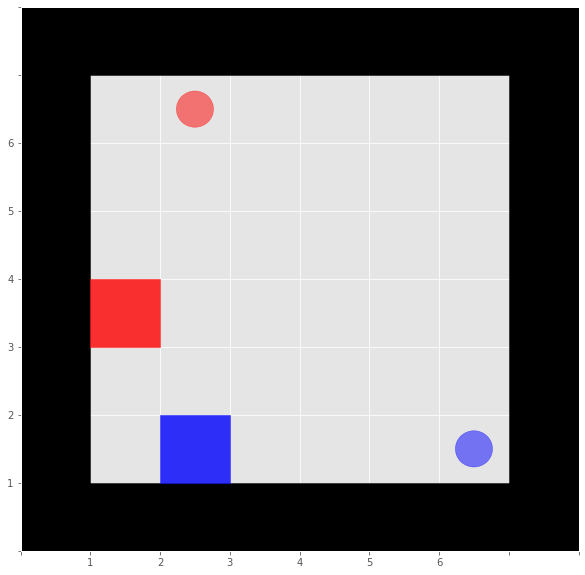

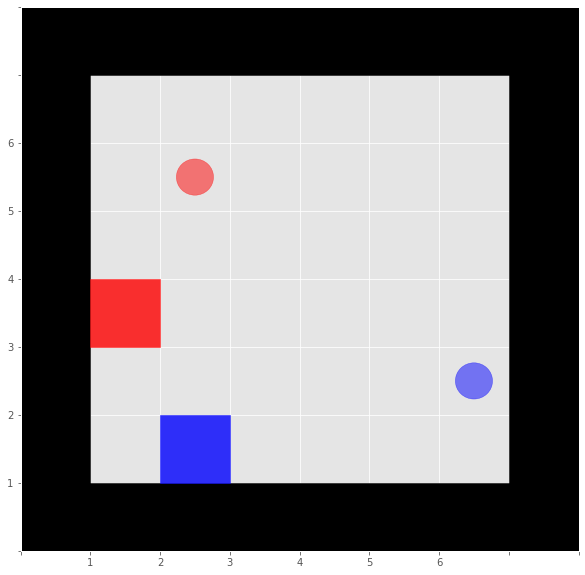

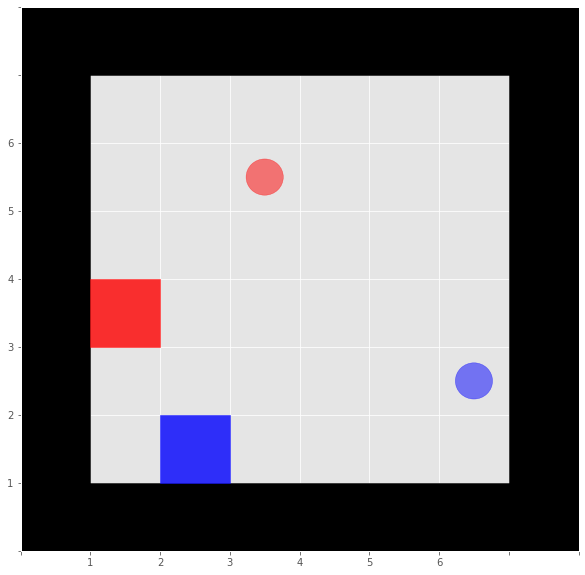

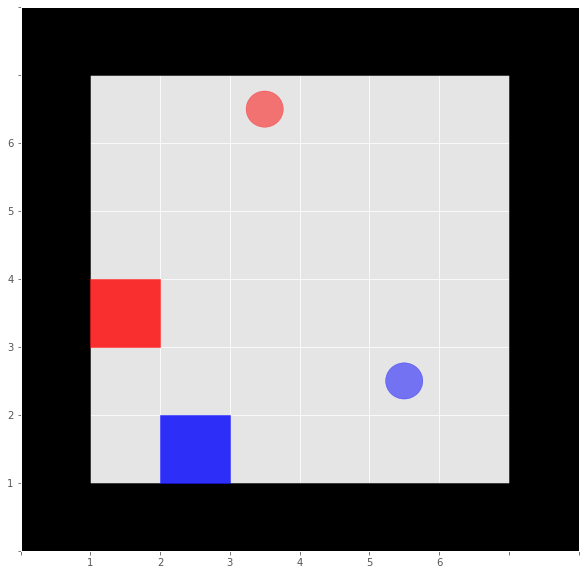

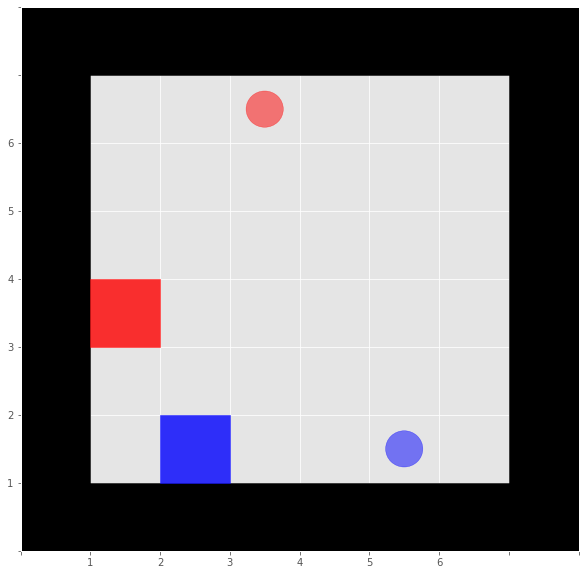

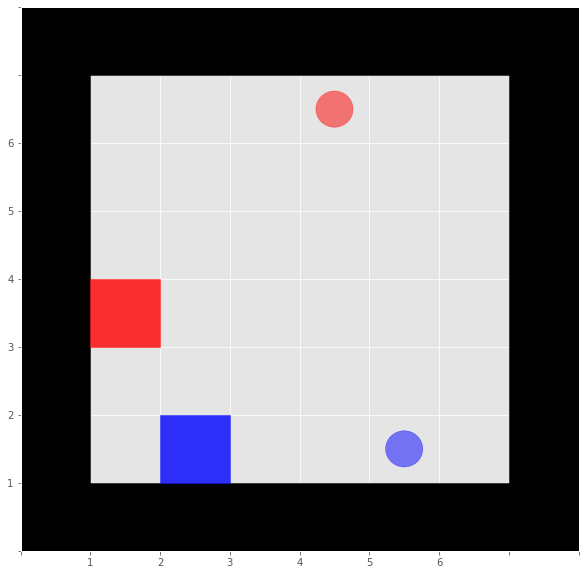

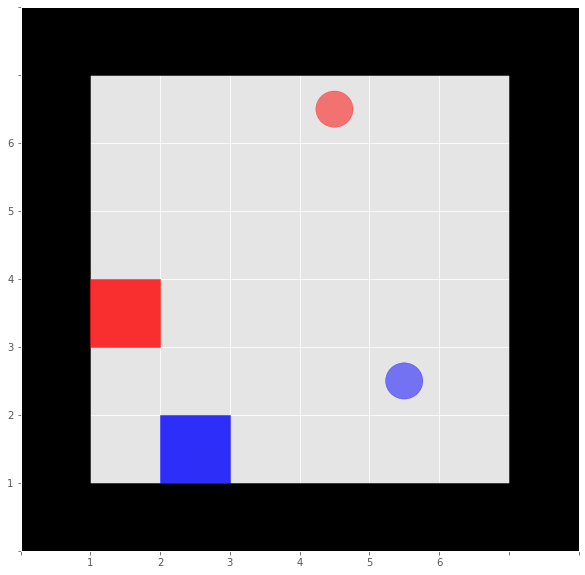

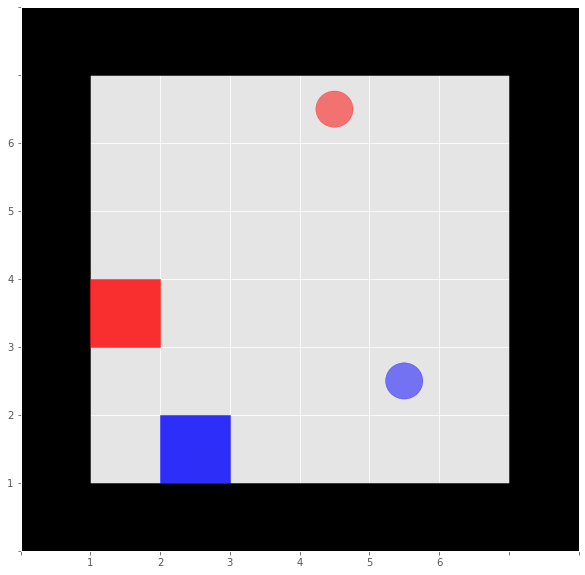

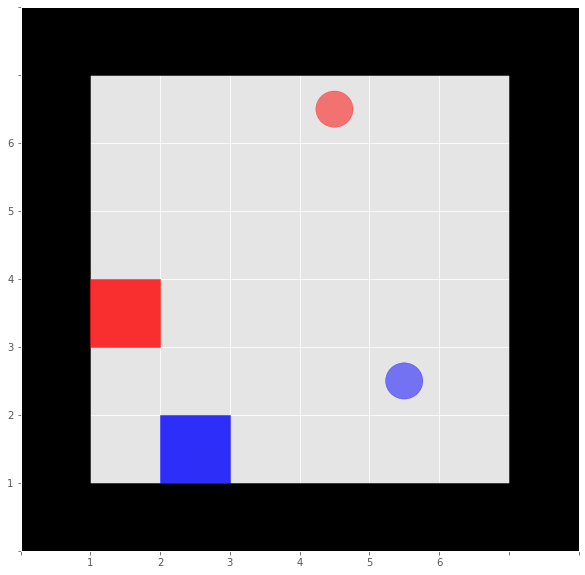

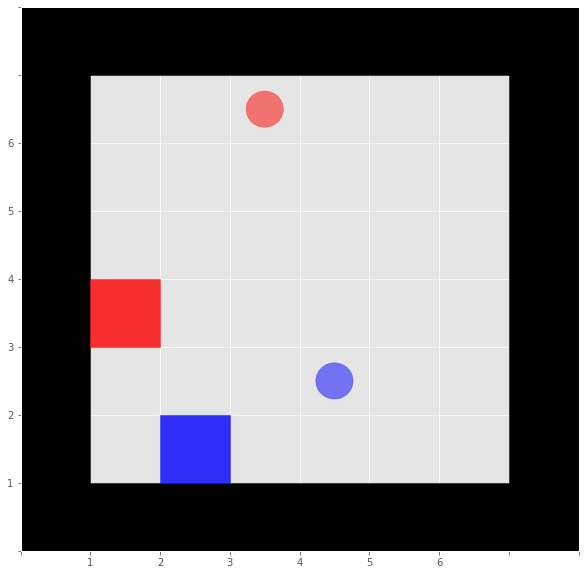

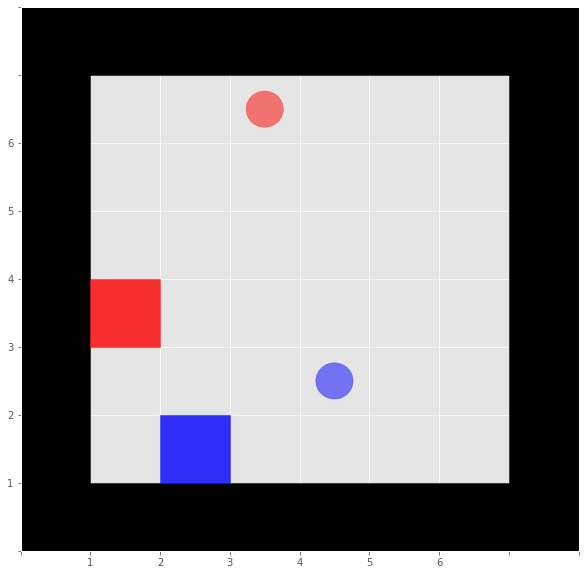

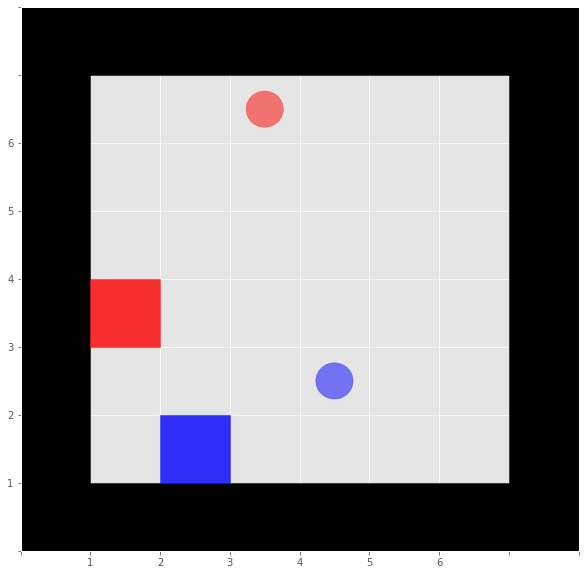

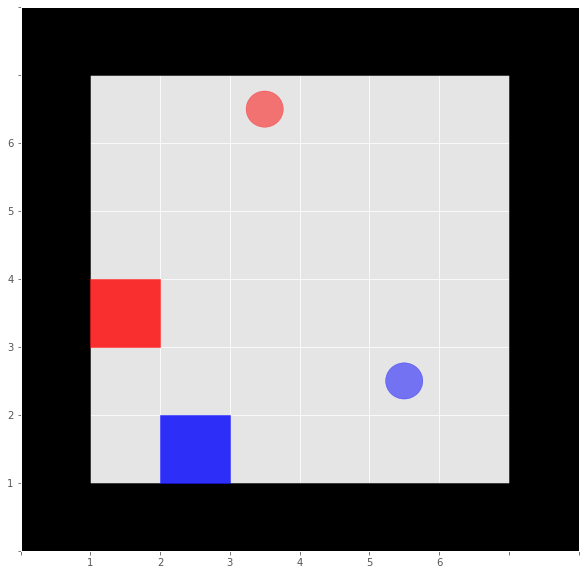

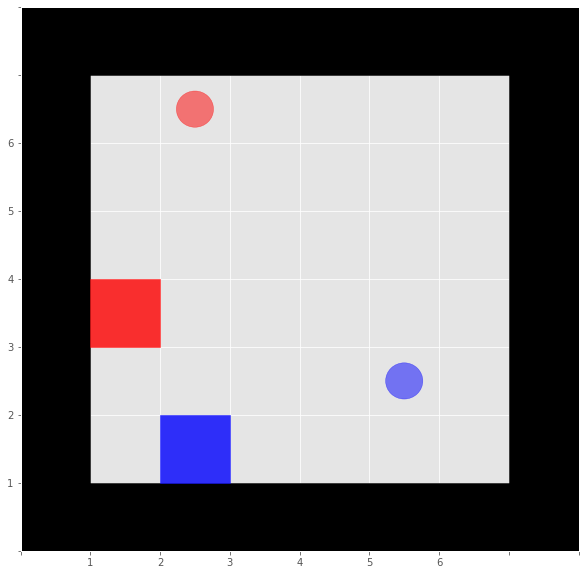

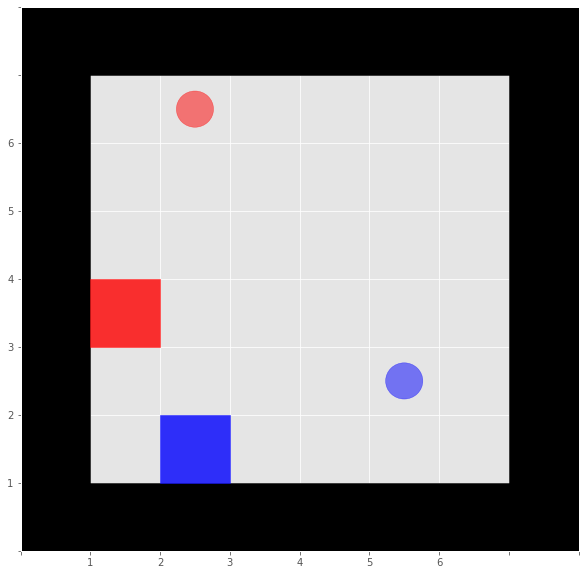

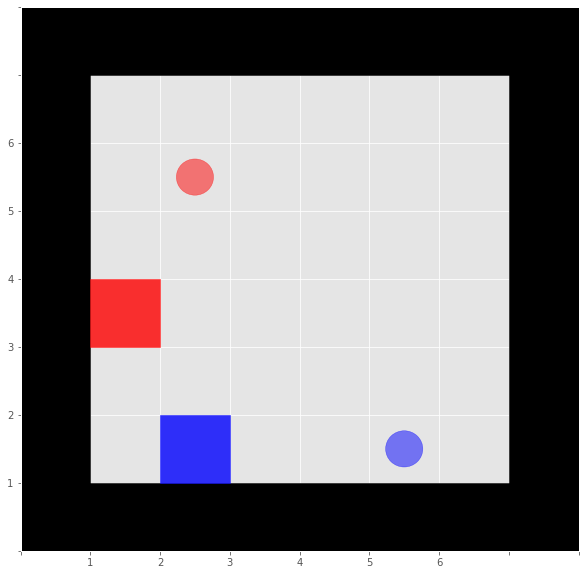

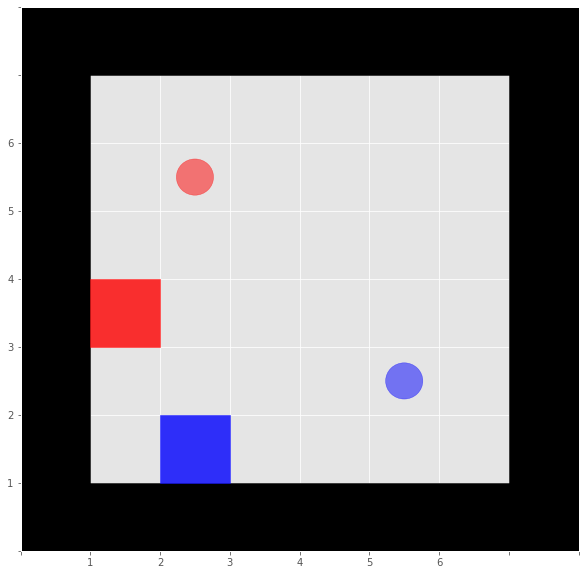

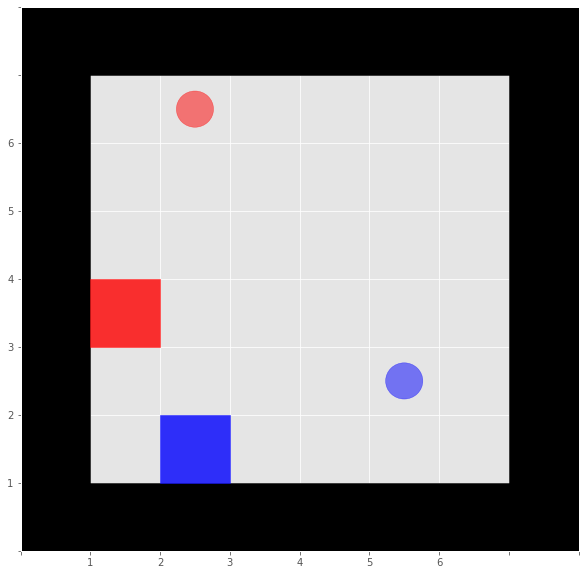

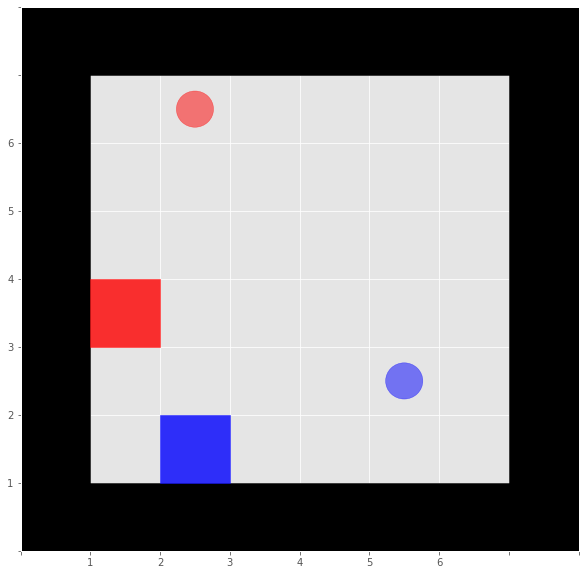

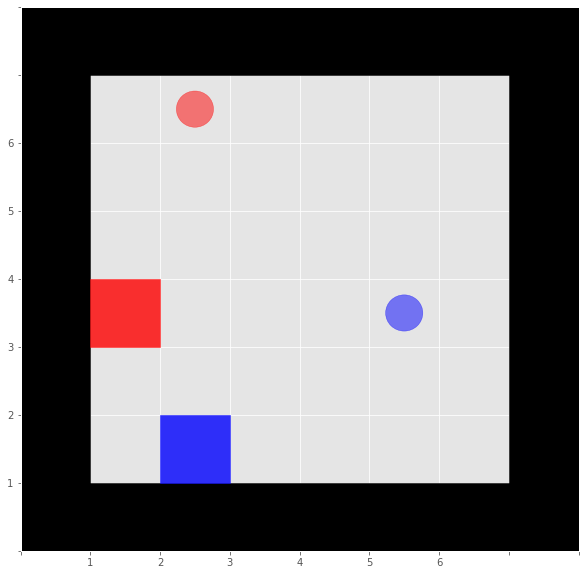

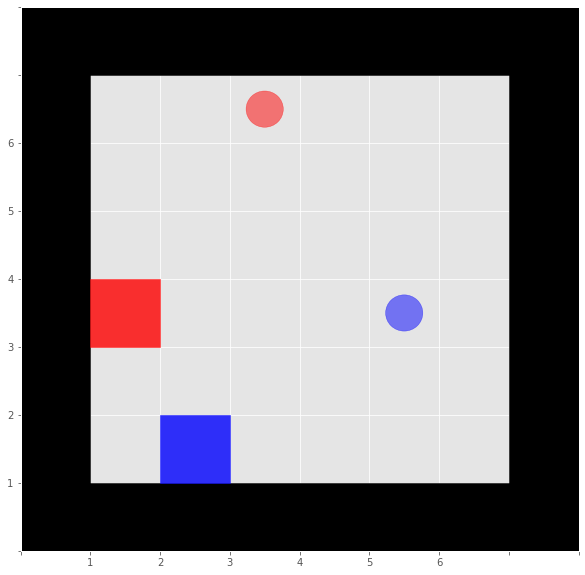

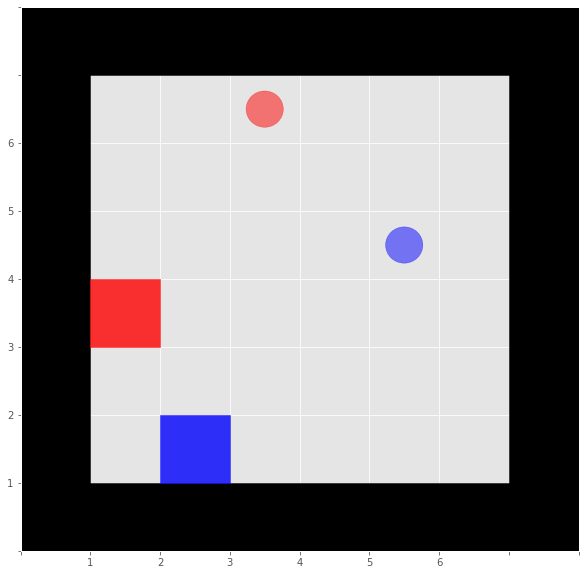

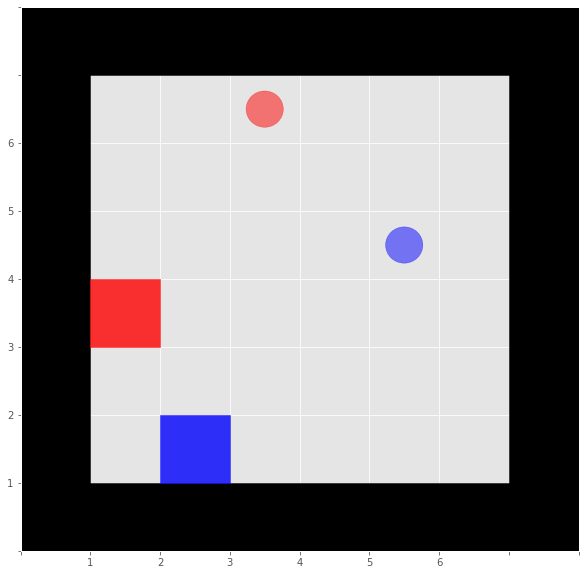

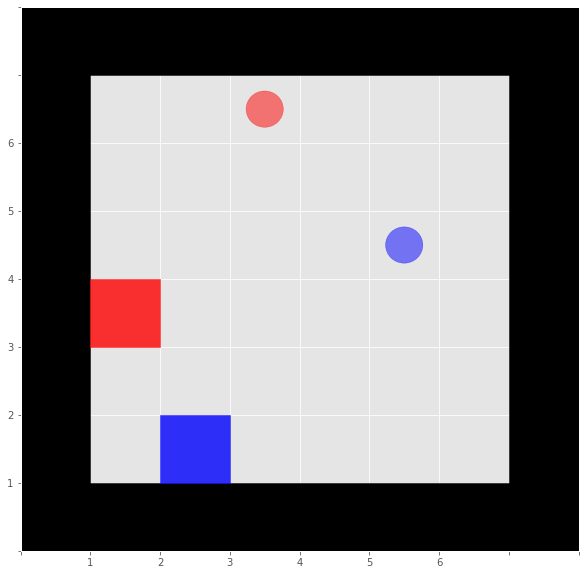

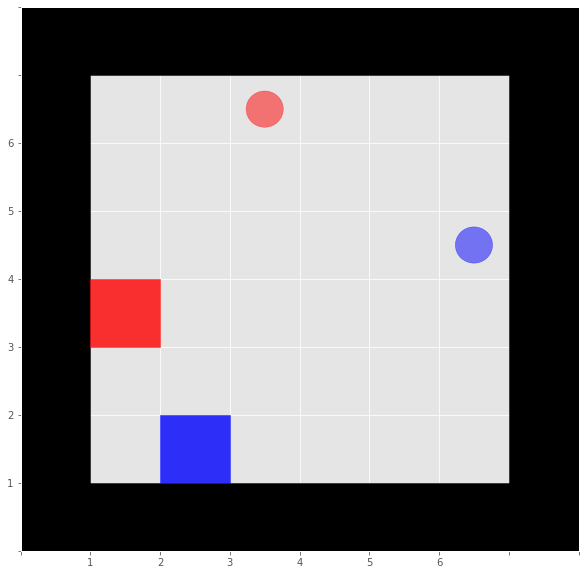

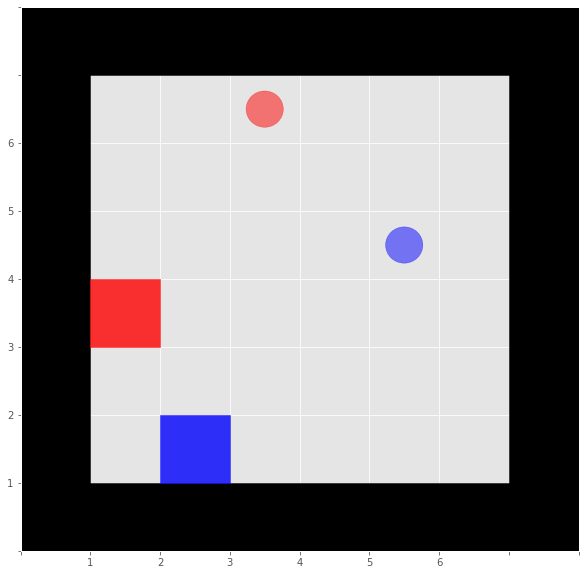

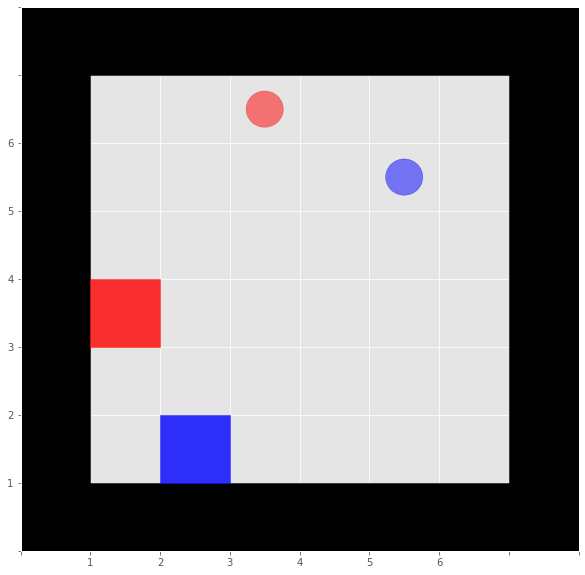

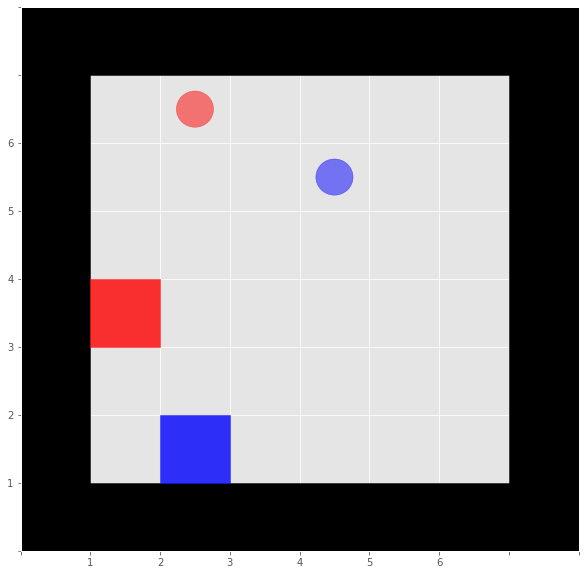

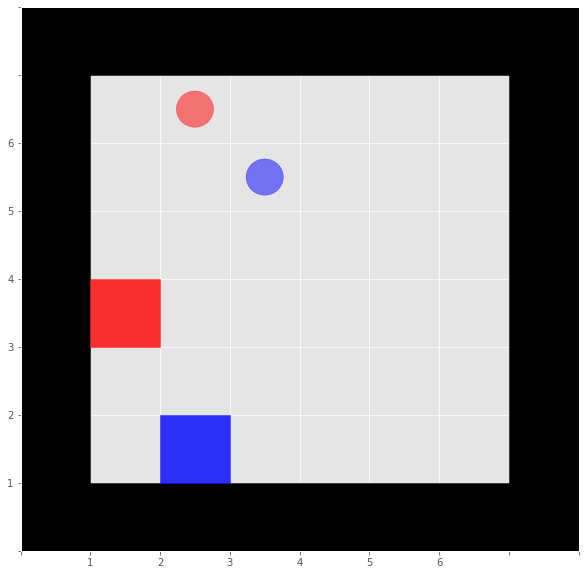

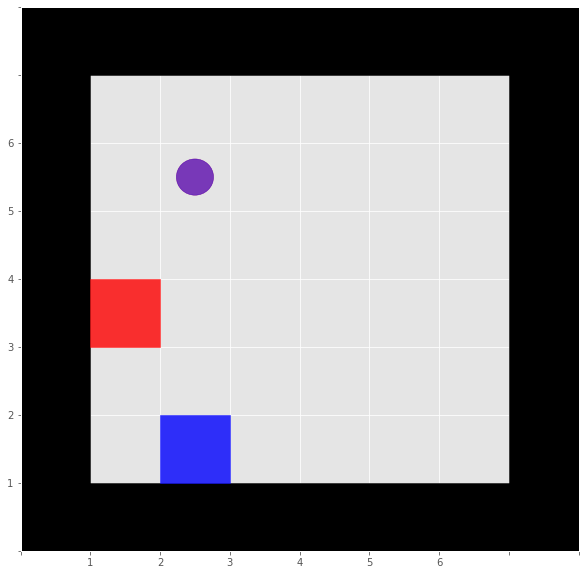

In [ ]:
world = EscapeRoom()
state=world.reset()
state,reward,done,_=world.step()
while(done!=True):
  action=epsilon_greedy_policy(q,state,0.8)
  state,reward,done,_=world.step(action)
  world.render()

# Second Agent Training

In [ ]:
q2=defaultdict(int)

In [ ]:
alpha=0.1
epsilon=1
gamma=0.99
caring_parameter=1

In [ ]:
i=0
epsilon=1
no_iter=100000
avg_reward=[]
for episode in range(no_iter):
  r=0
  i=1
  state=env.reset()
  epsilon = max(epsilon*0.999999, 0.2)
  while True:s

    action=epsilon_greedy_policy(q2,state,epsilon)
    next_state,reward,done,_=env.step(action)

    update_qtable(q2,state,action,reward[1]+gamma*caring_parameter*min(0.0,q[(state[0][0],state[0][1],state[1][0],state[1][1],action[0],action[1])]),next_state,alpha,gamma)
  
    state=next_state

    r+=reward[1]+reward[0]

   
    i+=1

    #print(reward)
    #r1+=reward[0]
    #r2+=reward[1]

    if done==True:
      avg_reward.append(r/i)
      break

    if i == 75:
      break
#env.close()

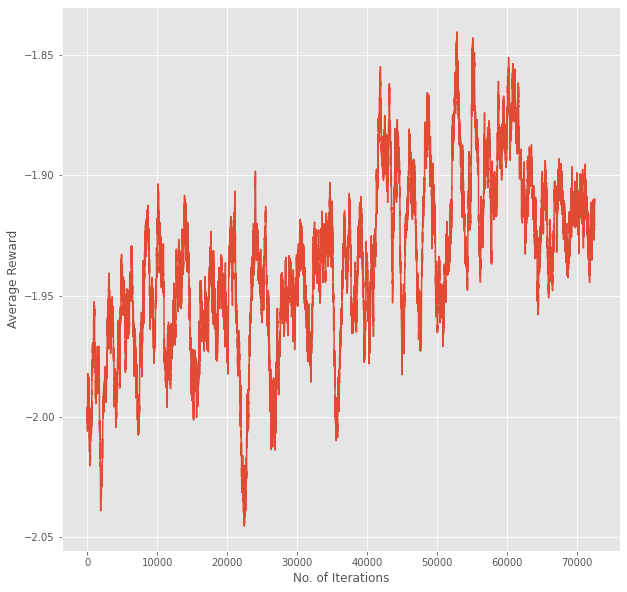

In [ ]:
avg_reward2=[]
r=0

drange=500
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()

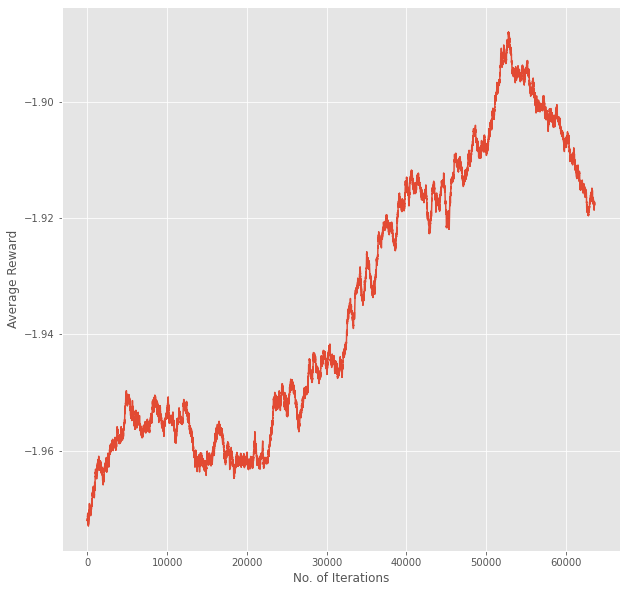

In [ ]:
avg_reward2=[]
r=0

drange=5000
for i in np.arange(drange,len(avg_reward)-drange):
  r=np.mean(avg_reward[i-drange:i+drange])
  avg_reward2.append(r)

plt.plot(avg_reward2)
plt.xlabel("No. of Iterations")
plt.ylabel("Average Reward")
plt.show()